In [57]:
!pip install missingno

In [58]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [60]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, log_loss

import missingno as msno
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [61]:
pd.set_option('display.max_columns',400)

In [8]:
# Collisions.csv has 213584 rows in reality, but we are only loading/previewing the first 1000 rows
dfOnline = pd.read_csv("http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv")


In [5]:
#read in collision's dataset provided by coursera
df = pd.read_csv('Data-Collisions.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [18]:
df.shape

(194673, 38)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [8]:
df.nunique()

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE           115
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

In [15]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [17]:
df.isnull().sum()/194673*100

SEVERITYCODE       0.000000
X                  2.739979
Y                  2.739979
OBJECTID           0.000000
INCKEY             0.000000
COLDETKEY          0.000000
REPORTNO           0.000000
STATUS             0.000000
ADDRTYPE           0.989351
INTKEY            66.574718
LOCATION           1.375126
EXCEPTRSNCODE     56.434123
EXCEPTRSNDESC     97.103861
SEVERITYCODE.1     0.000000
SEVERITYDESC       0.000000
COLLISIONTYPE      2.519096
PERSONCOUNT        0.000000
PEDCOUNT           0.000000
PEDCYLCOUNT        0.000000
VEHCOUNT           0.000000
INCDATE            0.000000
INCDTTM            0.000000
JUNCTIONTYPE       3.251093
SDOT_COLCODE       0.000000
SDOT_COLDESC       0.000000
INATTENTIONIND    84.689710
UNDERINFL          2.508822
WEATHER            2.610018
ROADCOND           2.574574
LIGHTCOND          2.655736
PEDROWNOTGRNT     97.602646
SDOTCOLNUM        40.959455
SPEEDING          95.205807
ST_COLCODE         0.009246
ST_COLDESC         2.519096
SEGLANEKEY         0

<AxesSubplot:>

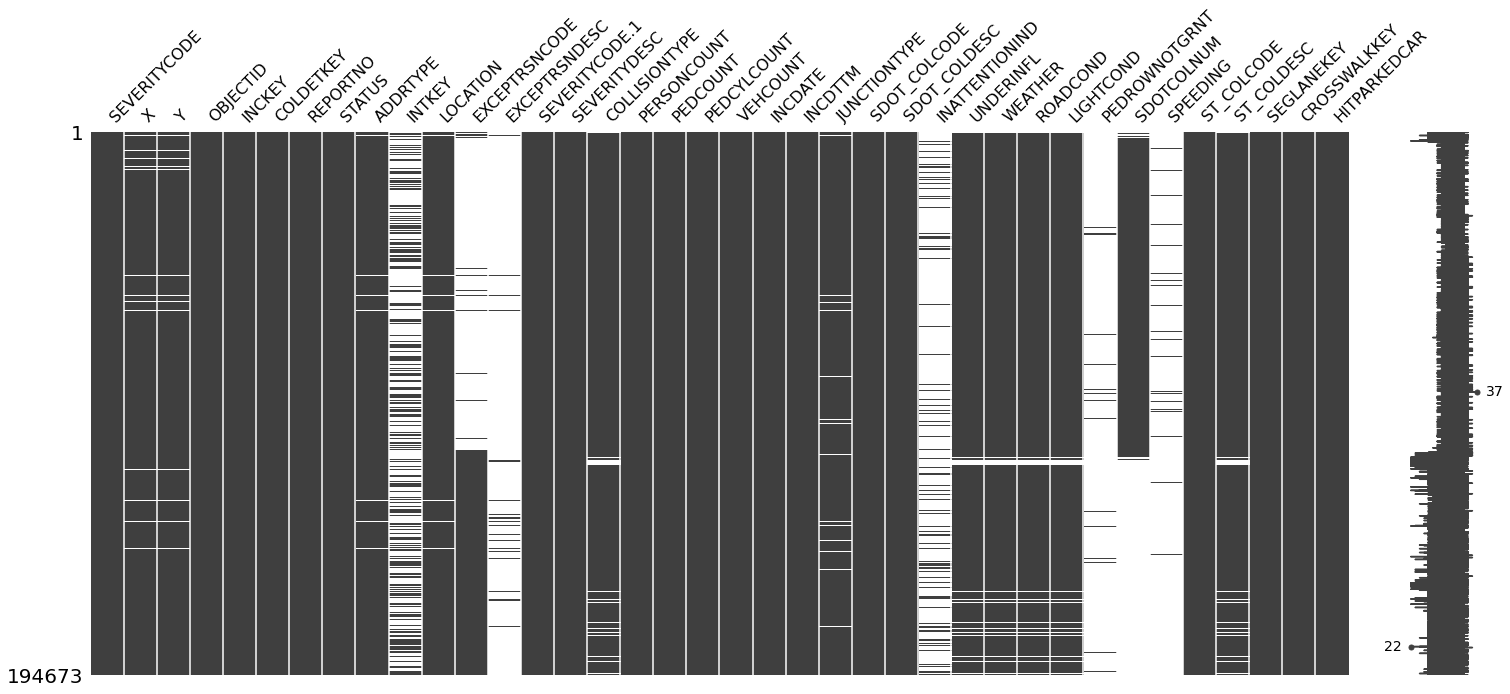

In [23]:
msno.matrix(df)

In [24]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [25]:
EmptyAttributesCols = ['INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING']

List of columns where there is an insufficient amount of data

In [9]:
df['SEVERITYCODE'].unique()

array([2, 1])

In [11]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Severity code 1: Proprty Damage
              2: Injury

Text(0.5, 1.0, 'Count of each Severity Code from Coursera Provided Data')

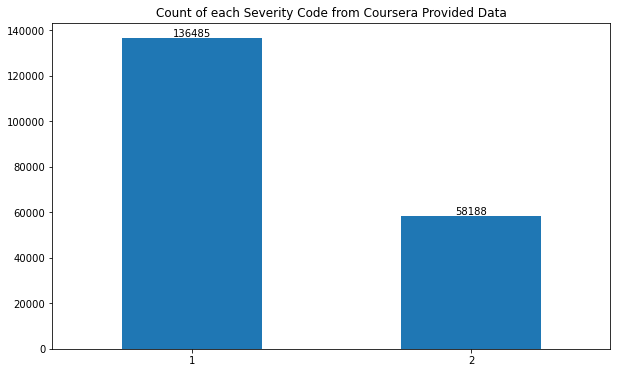

In [6]:
plt.figure(figsize=(10,6))
df['SEVERITYCODE'].value_counts().plot.bar()

#annotate bar counts
for p in plt.gca().patches:
    plt.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height()+1),
                va='bottom', ha='center',fontsize=10)
plt.xticks(rotation=0)
plt.title('Count of each Severity Code from Coursera Provided Data')

Labelling of classes is unbalanced and it only represents 2 of the possible 5 severity codes.

In [10]:
df['STATUS'].unique()

array(['Matched', 'Unmatched'], dtype=object)

In [20]:
df['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley', nan], dtype=object)

# Import Seattle collision dataset from seattle's opendata platform

In [62]:
#use new dataset pulled from seattle gov's open data platform
#read dataset from seattle open datasets website
df1 = pd.read_csv("http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv")

In [63]:
#store a copy
df1_copy = df1.copy()

In [64]:
#view shape of dataset
df1.shape

(221389, 40)

In [65]:
#view first 5 rows of dataset
df1.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.320757,47.609408,1,328476,329976,EA08706,Matched,Block,NaN,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020/01/22 00:00:00+00,1/22/2020 3:21:00 PM,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.319561,47.662221,2,328142,329642,EA06882,Matched,Block,NaN,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2020/01/07 00:00:00+00,1/7/2020 8:00:00 AM,Mid-Block (not related to intersection),15.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
2,-122.327525,47.604393,3,20700,20700,1181833,Unmatched,Block,NaN,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/01/30 00:00:00+00,1/30/2004,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4030032.0,NaN,NaN,NaN,0,0,N
3,-122.327525,47.708622,4,332126,333626,M16001640,Unmatched,Block,NaN,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2016/01/23 00:00:00+00,1/23/2016,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.292120,47.559009,5,328238,329738,3857118,Unmatched,Block,NaN,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/01/26 00:00:00+00,1/26/2020,Mid-Block (not related to intersection),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [66]:
#view attribute datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213918 non-null  float64
 1   Y                213918 non-null  float64
 2   OBJECTID         221389 non-null  int64  
 3   INCKEY           221389 non-null  int64  
 4   COLDETKEY        221389 non-null  int64  
 5   REPORTNO         221389 non-null  object 
 6   STATUS           221389 non-null  object 
 7   ADDRTYPE         217677 non-null  object 
 8   INTKEY           71884 non-null   float64
 9   LOCATION         216801 non-null  object 
 10  EXCEPTRSNCODE    100986 non-null  object 
 11  EXCEPTRSNDESC    11779 non-null   object 
 12  SEVERITYCODE     221388 non-null  object 
 13  SEVERITYDESC     221389 non-null  object 
 14  COLLISIONTYPE    195159 non-null  object 
 15  PERSONCOUNT      221389 non-null  int64  
 16  PEDCOUNT         221389 non-null  int6

# Convert date attributes to datetime datatype

In [67]:
#convert the INCDATE AND INCDTTM attributes to datetime
df1['INCDATE'] = pd.to_datetime(df1['INCDATE'])

In [68]:
df1['INCDTTM'] = pd.to_datetime(df1['INCDTTM'])

In [13]:
df1.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.320757,47.609408,1,328476,329976,EA08706,Matched,Block,NaN,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020-01-22 00:00:00+00:00,2020-01-22 15:21:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.319561,47.662221,2,328142,329642,EA06882,Matched,Block,NaN,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2020-01-07 00:00:00+00:00,2020-01-07 08:00:00,Mid-Block (not related to intersection),15.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
2,-122.327525,47.604393,3,20700,20700,1181833,Unmatched,Block,NaN,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004-01-30 00:00:00+00:00,2004-01-30 00:00:00,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4030032.0,NaN,NaN,NaN,0,0,N
3,-122.327525,47.708622,4,332126,333626,M16001640,Unmatched,Block,NaN,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2016-01-23 00:00:00+00:00,2016-01-23 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.292120,47.559009,5,328238,329738,3857118,Unmatched,Block,NaN,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020-01-26 00:00:00+00:00,2020-01-26 00:00:00,Mid-Block (not related to intersection),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [15]:
df1['INCDATE'].min()

Timestamp('2003-10-06 00:00:00+0000', tz='UTC')

In [16]:
df1['INCDATE'].max()

Timestamp('2020-09-05 00:00:00+0000', tz='UTC')

# Split out the day, month, year and hour from the INCDTTM attribute

In [13]:
#create columns to store the day, month, year, hour and dayOfWeek of each incident
df1['INCDAY'] = df1['INCDTTM'].dt.day
df1['INCMONTH'] = df1['INCDTTM'].dt.month
df1['INCYEAR'] = df1['INCDTTM'].dt.year
df1['INCHOUR'] = df1['INCDTTM'].dt.hour
df1['INCWEEKDAY'] = df1['INCDTTM'].dt.dayofweek

In [14]:
#view update
df1[['INCDTTM','INCDAY','INCMONTH','INCYEAR','INCHOUR','INCWEEKDAY']].head()

,INCDTTM,INCDAY,INCMONTH,INCYEAR,INCHOUR,INCWEEKDAY
0,2020-01-22 15:21:00,22,1,2020,15,2
1,2020-01-07 08:00:00,7,1,2020,8,1
2,2004-01-30 00:00:00,30,1,2004,0,4
3,2016-01-23 00:00:00,23,1,2016,0,5
4,2020-01-26 00:00:00,26,1,2020,0,6


In [15]:
#map day of week to string day of week
df1['INCWEEKDAYNAME'] = df1['INCWEEKDAY'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [16]:
df1[['INCDTTM','INCDAY','INCMONTH','INCYEAR','INCHOUR','INCWEEKDAY','INCWEEKDAYNAME']]

,INCDTTM,INCDAY,INCMONTH,INCYEAR,INCHOUR,INCWEEKDAY,INCWEEKDAYNAME
0,2020-01-22 15:21:00,22,1,2020,15,2,Wed
1,2020-01-07 08:00:00,7,1,2020,8,1,Tue
2,2004-01-30 00:00:00,30,1,2004,0,4,Fri
3,2016-01-23 00:00:00,23,1,2016,0,5,Sat
4,2020-01-26 00:00:00,26,1,2020,0,6,Sun
...,...,...,...,...,...,...,...
221384,2020-04-24 14:33:00,24,4,2020,14,4,Fri
221385,2020-04-12 00:00:00,12,4,2020,0,6,Sun
221386,2020-02-24 09:26:00,24,2,2020,9,0,Mon
221387,2020-03-13 06:53:00,13,3,2020,6,4,Fri


In [17]:
df1[['INCDATE','INCDTTM','INCDAY','INCMONTH','INCYEAR','INCHOUR','INCWEEKDAY','INCWEEKDAYNAME']].dtypes

INCDATE           datetime64[ns, UTC]
INCDTTM                datetime64[ns]
INCDAY                          int64
INCMONTH                        int64
INCYEAR                         int64
INCHOUR                         int64
INCWEEKDAY                      int64
INCWEEKDAYNAME                 object
dtype: object

In [18]:
#Keep only the date portion of INCDATE attribute
df1['INCDATE'] = df1['INCDATE'].dt.date
df1['INCDATE'] = pd.to_datetime(df1['INCDATE'])

In [19]:
#view data types
df1[['INCDATE','INCDTTM']].dtypes

INCDATE    datetime64[ns]
INCDTTM    datetime64[ns]
dtype: object

In [20]:
df1[['INCDATE','INCDTTM']].head()

,INCDATE,INCDTTM
0,2020-01-22,2020-01-22 15:21:00
1,2020-01-07,2020-01-07 08:00:00
2,2004-01-30,2004-01-30 00:00:00
3,2016-01-23,2016-01-23 00:00:00
4,2020-01-26,2020-01-26 00:00:00


# Assess Severity Code Types

Text(0.5, 0, 'Severity Code')

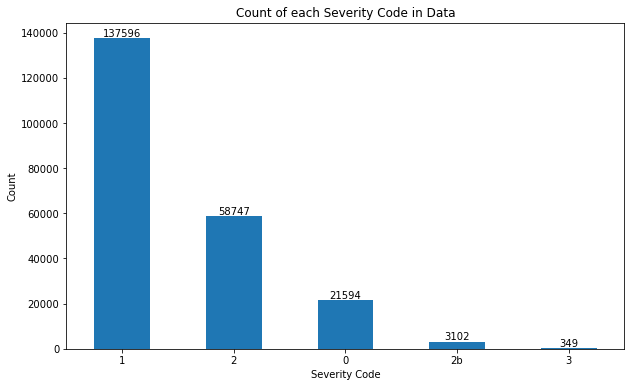

In [17]:
plt.figure(figsize=(10,6))
df1['SEVERITYCODE'].value_counts().plot.bar()

#annotate bar counts
for p in plt.gca().patches:
    plt.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height()+1),
                va='bottom', ha='center',fontsize=10)
plt.xticks(rotation=0)
plt.title('Count of each Severity Code in Data')
plt.ylabel('Count')
plt.xlabel('Severity Code')

# Assess Missing Data

In [45]:
#set INCDATE attribute as the index
#df1.set_index("INCDATE", inplace = True)

In [55]:
#view change
df1.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,INCDAY,INCMONTH,INCYEAR,INCHOUR,INCWEEKDAY,INCWEEKDAYNAME
INCDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-20,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2019-11-20 10:25:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N,20,11,2019,10,2,Wed
2019-11-18,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,,NaN,2,Injury Collision,Angles,4,0,0,2,2,0,0,2019-11-18 17:01:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N,18,11,2019,17,0,Mon
2020-02-20,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,,NaN,1,Property Damage Only Collision,Sideswipe,4,0,0,3,0,0,0,2020-02-20 08:42:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N,20,2,2020,8,3,Thu
2004-06-08,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,NaN,NaN,1,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,2004-06-08 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N,8,6,2004,0,1,Tue
2004-10-15,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004-10-15 00:00:00,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N,15,10,2004,0,4,Fri


<AxesSubplot:>

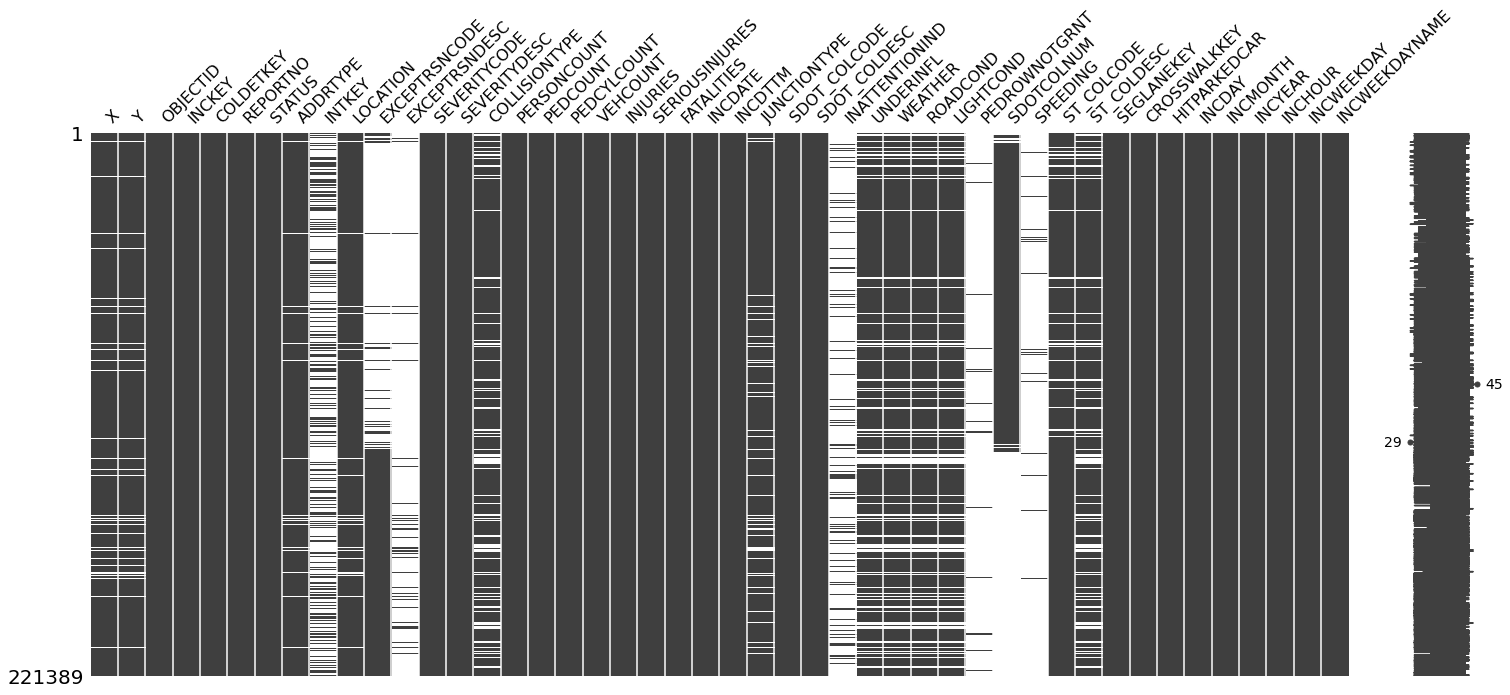

In [22]:
#view completness of each attribute
msno.matrix(df1)

In [21]:
df1[~df1['EXCEPTRSNDESC'].isnull()]['EXCEPTRSNDESC'].unique()

array(['Not Enough Information, or Insufficient Location Information'],
      dtype=object)

In [23]:
df1[~df1['EXCEPTRSNCODE'].isnull()]['EXCEPTRSNCODE'].unique()

array([' ', 'NEI'], dtype=object)

In [25]:
df1[~df1['INATTENTIONIND'].isnull()]['INATTENTIONIND'].unique()

array(['Y'], dtype=object)

In [26]:
df1[~df1['SDOTCOLNUM'].isnull()]['SDOTCOLNUM'].unique()

array([ 4030032.,  5365032.,  5209012., ..., 13016008., 13029022.,
       13039006.])

In [23]:
#percentage missing of each attribute
df1.isnull().sum()/df1.shape[0]*100

X                   3.374603
Y                   3.374603
OBJECTID            0.000000
INCKEY              0.000000
COLDETKEY           0.000000
REPORTNO            0.000000
STATUS              0.000000
ADDRTYPE            1.676687
INTKEY             67.530455
LOCATION            2.072370
EXCEPTRSNCODE      54.385268
EXCEPTRSNDESC      94.679501
SEVERITYCODE        0.000452
SEVERITYDESC        0.000000
COLLISIONTYPE      11.847924
PERSONCOUNT         0.000000
PEDCOUNT            0.000000
PEDCYLCOUNT         0.000000
VEHCOUNT            0.000000
INJURIES            0.000000
SERIOUSINJURIES     0.000000
FATALITIES          0.000000
INCDATE             0.000000
INCDTTM             0.000000
JUNCTIONTYPE        5.407676
SDOT_COLCODE        0.000452
SDOT_COLDESC        0.000452
INATTENTIONIND     86.364273
UNDERINFL          11.838890
WEATHER            11.933746
ROADCOND           11.897158
LIGHTCOND          11.973946
PEDROWNOTGRNT      97.654807
SDOTCOLNUM         42.542312
SPEEDING      

In [69]:
seriesMissingPer = df1.isnull().sum()/df1.shape[0]*100

In [70]:
seriesMissingPer_sort = seriesMissingPer.sort_values(ascending=True)

Text(0.5, 1.0, 'Percentage of missing records for each attribute')

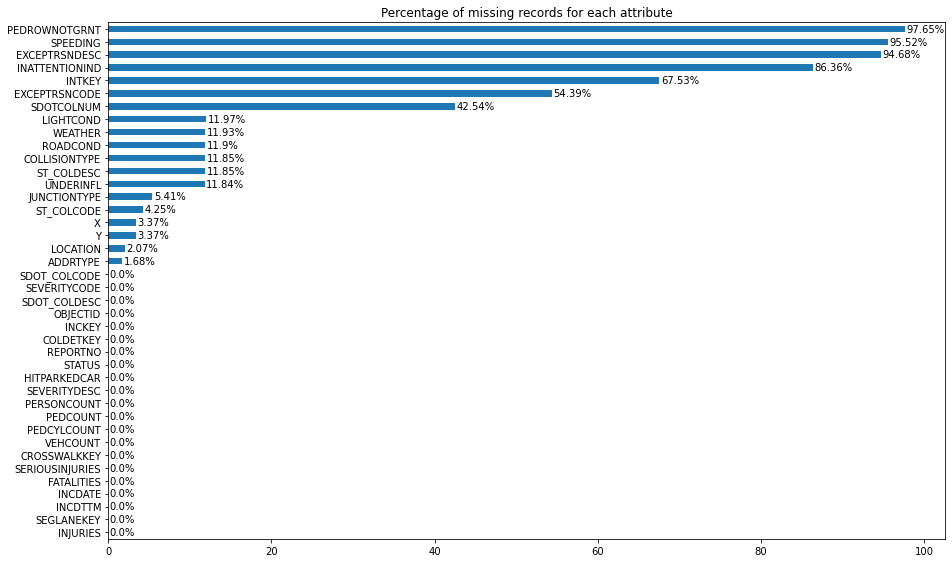

In [30]:
#plot percentage of missing records for each attribute
plt.figure(figsize=(15,9.5))
seriesMissingPer_sort.plot.barh()

#annotate bar counts    
for i, v in enumerate(seriesMissingPer_sort):
    plt.text(v+0.2, i, str(round(v, 2))+'%', va="center")    
plt.title('Percentage of missing records for each attribute')


#annotate bar counts
#for p in plt.gca().patches:
#    plt.annotate(str(p.get_height()), (p.get_height()+0.25, p.get_x()+1),
#                va='bottom', ha='center',fontsize=10)



In [27]:
#show list of columns
df1.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'INCDAY',
       'INCMONTH', 'INCYEAR', 'INCHOUR', 'INCWEEKDAY', 'INCWEEKDAYNAME'],
      dtype='object')

In [31]:
#shape of df1 dataframe before deleting sparse columns
df1.shape

(221389, 40)

In [71]:
# drop sparse columns
df2 = df1.drop(['SPEEDING','PEDROWNOTGRNT','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SDOTCOLNUM','INATTENTIONIND'], axis=1)

In [33]:
#view shape of df2 after dropping sparse columns
df2.shape

(221389, 33)

In [31]:
#view number of unique entries per attribute
df2.nunique()

X                   24972
Y                   24972
OBJECTID           221389
INCKEY             221389
COLDETKEY          221389
REPORTNO           221386
STATUS                  2
ADDRTYPE                3
LOCATION            25198
SEVERITYCODE            5
SEVERITYDESC            5
COLLISIONTYPE          10
PERSONCOUNT            48
PEDCOUNT                7
PEDCYLCOUNT             3
VEHCOUNT               16
INJURIES               16
SERIOUSINJURIES         7
FATALITIES              6
INCDATE              6086
INCDTTM            169519
JUNCTIONTYPE            7
SDOT_COLCODE           40
SDOT_COLDESC           40
UNDERINFL               4
WEATHER                12
ROADCOND                9
LIGHTCOND               9
ST_COLCODE             63
ST_COLDESC             62
SEGLANEKEY           2101
CROSSWALKKEY         2343
HITPARKEDCAR            2
INCDAY                 31
INCMONTH               12
INCYEAR                18
INCHOUR                24
INCWEEKDAY              7
INCWEEKDAYNA

<AxesSubplot:>

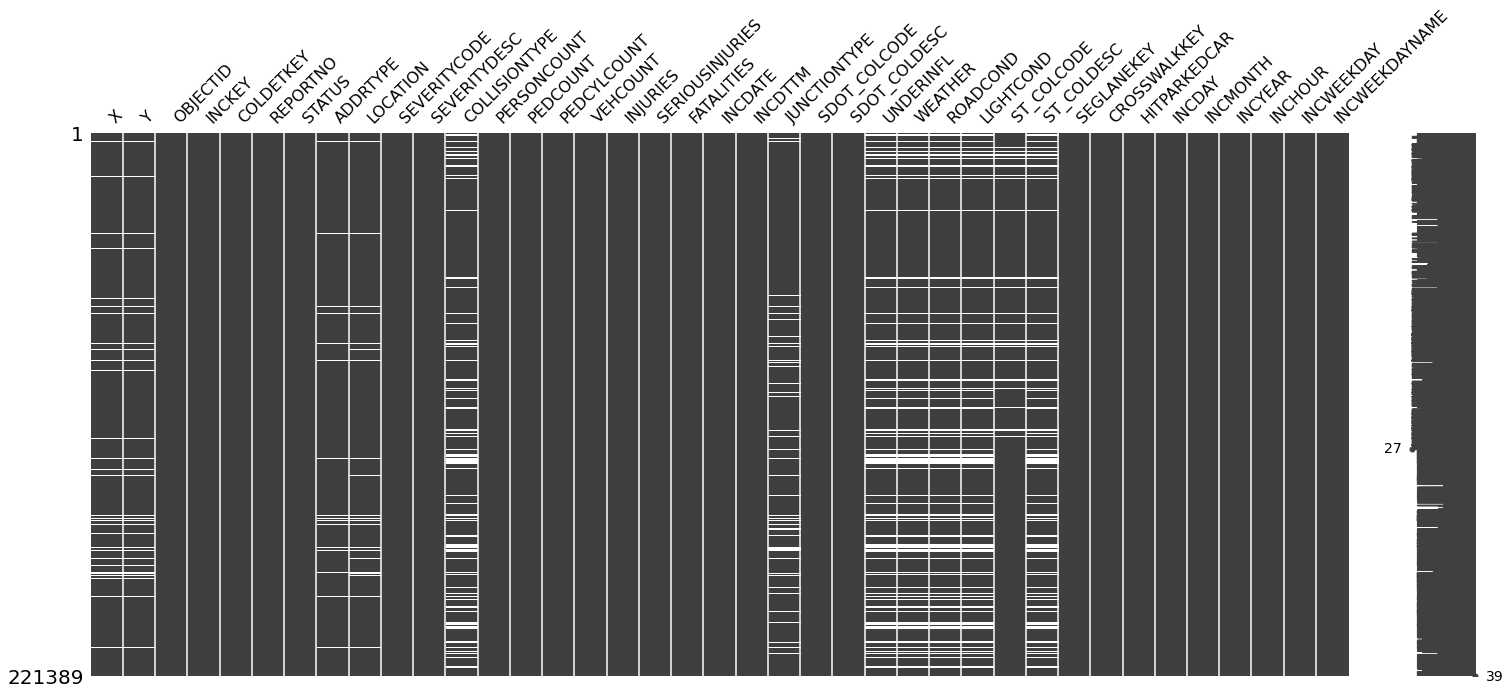

In [32]:
#View matrix completness of dataset
msno.matrix(df2)

In [77]:
df2.dropna().shape

(184934, 38)

In [33]:
#test to see what percentage of data would remaining if rows with missing data were removed
print('Remaining % of data',(df2.dropna().shape[0])/(df2.shape[0])*100)

Remaining % of data 83.70650755005894


# Assess inconsistency of the pattern of missing data between attribute ST_COLDESC and ST_COLCODE 

In [34]:
df2['ST_COLCODE'].unique()

array(['11', '32', nan, ' ', '14', '50', '81', '10', '12', '23', '6',
       '28', '13', '2', '1', '20', '84', '45', '15', '3', '16', '26', '0',
       '19', '5', '25', '24', '74', '73', '71', '30', '27', '21', '83',
       '22', '52', '57', '56', '8', '40', '51', '66', '53', '72', '4',
       '29', '17', '41', '65', '82', '67', '49', '31', '43', '42', '48',
       '64', '54', '60', '87', '7', '18', '85', '88'], dtype=object)

In [35]:
#Make empty ST_COLCODE row nans
df2.loc[(df2['ST_COLCODE']==' '),'ST_COLCODE'] = np.nan

In [ ]:
#View matrix completness of dataset
msno.matrix(df2)

<AxesSubplot:>

# Assess missing values correlation across attributes

<AxesSubplot:>

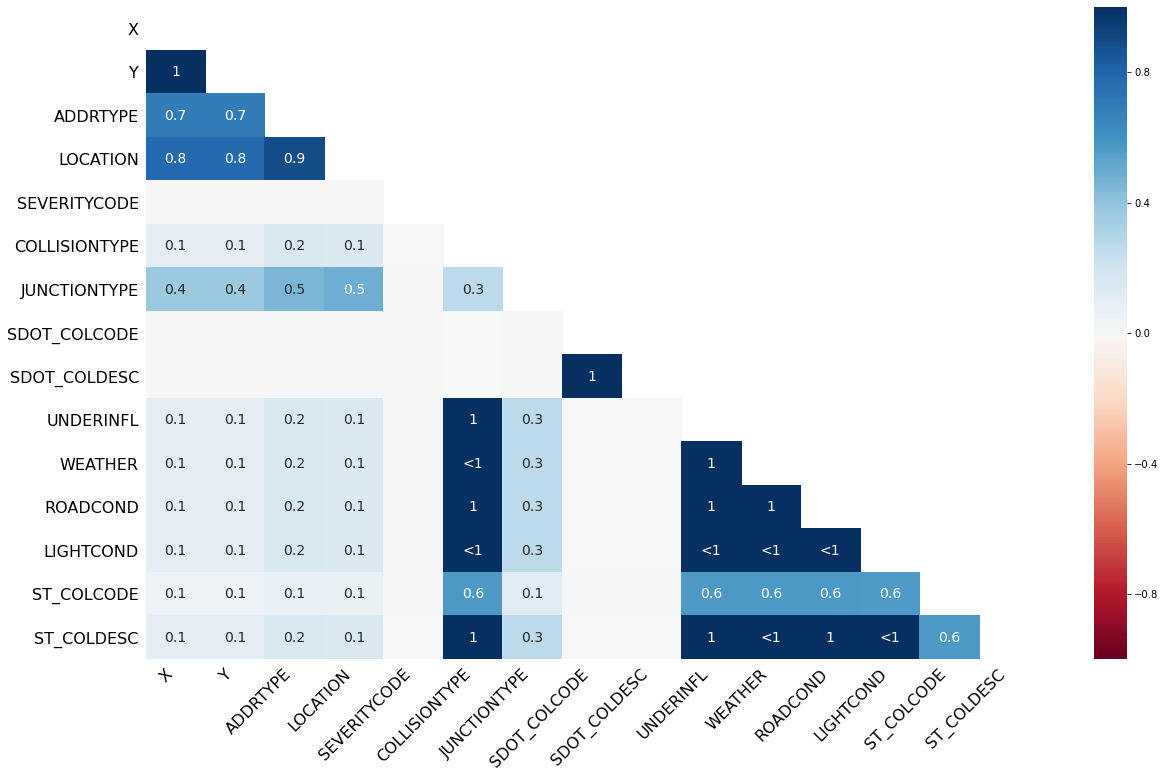

In [25]:
msno.heatmap(df2.drop('UNDERINFL_Coded',axis=1))

# View unique values for the categorical columns

In [12]:
#view categorical options for each categorical attribute
catColsList = ['LIGHTCOND','WEATHER','ROADCOND','COLLISIONTYPE','UNDERINFL','JUNCTIONTYPE','ADDRTYPE']
for col in catColsList:
    print('Attribute: ',col)
    print(df2[col].unique())

Attribute:  LIGHTCOND
['Dark - Street Lights On' 'Daylight' nan 'Dawn' 'Unknown'
 'Dark - No Street Lights' 'Dark - Street Lights Off' 'Dusk'
 'Dark - Unknown Lighting' 'Other']
Attribute:  WEATHER
['Raining' 'Clear' nan 'Overcast' 'Snowing' 'Unknown' 'Other'
 'Fog/Smog/Smoke' 'Partly Cloudy' 'Sleet/Hail/Freezing Rain'
 'Blowing Sand/Dirt' 'Severe Crosswind' 'Blowing Snow']
Attribute:  ROADCOND
['Wet' 'Dry' nan 'Unknown' 'Standing Water' 'Snow/Slush' 'Ice'
 'Sand/Mud/Dirt' 'Other' 'Oil']
Attribute:  COLLISIONTYPE
['Sideswipe' 'Parked Car' nan 'Rear Ended' 'Other' 'Angles' 'Cycles'
 'Left Turn' 'Pedestrian' 'Right Turn' 'Head On']
Attribute:  UNDERINFL
['N' nan '0' 'Y' '1']
Attribute:  JUNCTIONTYPE
['Mid-Block (not related to intersection)'
 'Mid-Block (but intersection related)'
 'At Intersection (intersection related)' 'Driveway Junction' nan
 'At Intersection (but not related to intersection)' 'Ramp Junction'
 'Unknown']
Attribute:  ADDRTYPE
['Block' 'Intersection' nan 'Alley']


Text(0.5, 0, 'UNDERINFL Code')

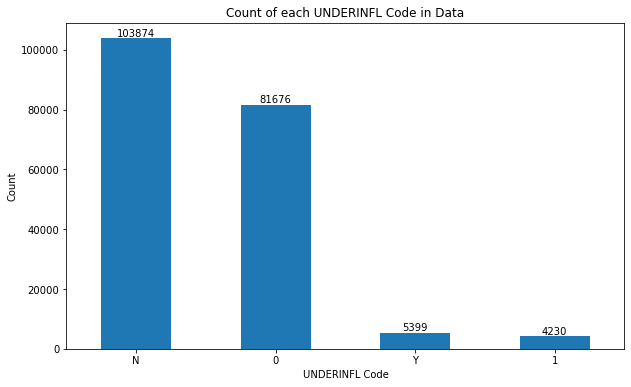

In [22]:
plt.figure(figsize=(10,6))
df2['UNDERINFL'].value_counts().plot.bar()

#annotate bar counts
for p in plt.gca().patches:
    plt.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height()+1),
                va='bottom', ha='center',fontsize=10)
plt.xticks(rotation=0)
plt.title('Count of each UNDERINFL Code in Data')
plt.ylabel('Count')
plt.xlabel('UNDERINFL Code')


In [72]:
#map day of week to string day of week
df2['UNDERINFL_Coded'] = df2['UNDERINFL'].map({'N':0, 'Y':1})

#### Replace LIGHTCOND, WEATHER, ROADCOND, COLLISIONTYPE, UNDERINFL, JUNCTIONTYPE, ST_COLCODE and ST_COLDESC with their modes

In [73]:
fillModeList = ['LIGHTCOND', 'WEATHER', 'ROADCOND', 'COLLISIONTYPE', 'UNDERINFL', 'JUNCTIONTYPE','ST_COLCODE','ST_COLDESC', 'UNDERINFL_Coded']

In [74]:
def fillMode(df,ModeList):
    dfc = df.copy()
    
    for col in ModeList:
        dfc[col].fillna(dfc[col].mode()[0],inplace = True)
    
    return dfc

In [75]:
df2_mode = fillMode(df2,fillModeList)

<AxesSubplot:>

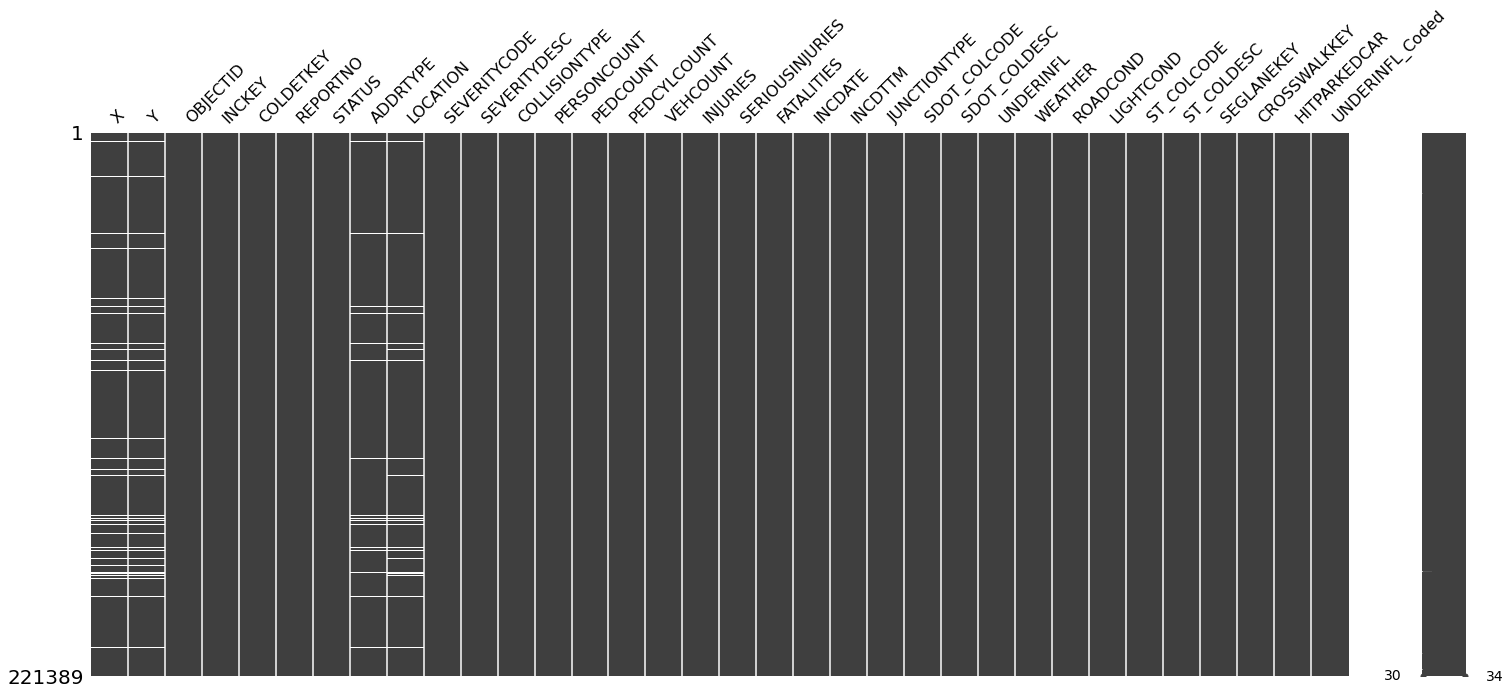

In [76]:
msno.matrix(df2_mode)

In [77]:
seriesMissingPer_dfMode = df2_mode.isnull().sum()/df2_mode.shape[0]*100
seriesMissingPer_sortMode = seriesMissingPer_dfMode.sort_values(ascending=True)

Text(0.5, 1.0, 'Percentage of missing records for each attribute')

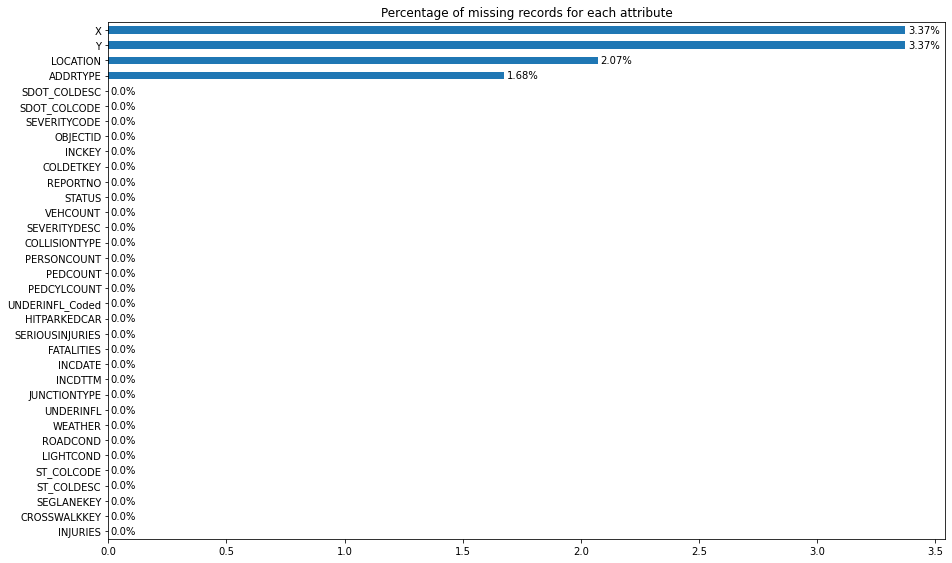

In [81]:
#plot percentage of missing records for each attribute
plt.figure(figsize=(15,9.5))
seriesMissingPer_sortMode.plot.barh()

#annotate bar counts    
for i, v in enumerate(seriesMissingPer_sortMode):
    plt.text(v+0.01, i, str(round(v, 2))+'%', va="center")    
plt.title('Percentage of missing records for each attribute')

In [40]:
df2_copy = df2.copy()
df2 = df2_mode.copy()

# Determine some of the missing X, Y Co-ordinate data from the location attribute

In [44]:
df2_Location = df2.loc[(df2['X'].isna()) & (df2['Y'].isna()) & (~df2['LOCATION'].isna())]

In [45]:
df2_Location['ADDRTYPE'].unique()

array(['Intersection', 'Block'], dtype=object)

In [46]:
#get number of missing coordinate data that has location information
df2_Location.shape

(2883, 34)

In [47]:
#intersection data could be determined using a geoloaction API
#filter the dataframe to look at missing co-ordinate data that has 'ADDRTYPE' as intersection
df2_intersection = df2_Location[df2_Location['ADDRTYPE']=='Intersection']

In [48]:
#get number of missing coordinate data that has attribute type ADDRTYPE as intersection
df2_intersection.shape

(350, 34)

In [49]:
#add column with concatenated city and country onto the location address
df2_intersection['Address'] = df2_intersection['LOCATION'] + ',' + ' Seattle' + ',' + 'USA'  

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
#view changes
df2_intersection.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,UNDERINFL_Coded,Address
620,NaN,NaN,621,19700,19700,1772779,Matched,Intersection,RAINIER AVE S AND S STEVENS ST,2,Injury Collision,Angles,3,0,0,2,1,0,0,2004-05-08 00:00:00+00:00,2004-05-08 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Overcast,Dry,Daylight,10,Entering at angle,0,0,N,0.0,"RAINIER AVE S AND S STEVENS ST, Seattle,USA"
799,NaN,NaN,800,33200,33200,1795420,Matched,Intersection,DUWAMISH AVE S AND S SPOKANE SR ST,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2005-05-20 00:00:00+00:00,2005-05-20 12:43:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,11,From same direction - both going straight - bo...,0,0,N,0.0,"DUWAMISH AVE S AND S SPOKANE SR ST, Seattle,USA"
1877,NaN,NaN,1878,1339,1339,3581767,Matched,Intersection,ALASKAN WY VI NB AND BATTERY ST TUN ON RP,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2013-03-27 00:00:00+00:00,2013-03-27 17:19:00,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,Overcast,Dry,Daylight,14,From same direction - both going straight - on...,0,0,N,0.0,"ALASKAN WY VI NB AND BATTERY ST TUN ON RP, Sea..."
2912,NaN,NaN,2913,16777,16777,3501906,Matched,Intersection,35TH AVE SW AND FAUNTLEROY N WAY SW,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2013-04-11 00:00:00+00:00,2013-04-11 06:27:00,At Intersection (intersection related),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",N,Overcast,Wet,Dawn,11,From same direction - both going straight - bo...,0,0,N,0.0,"35TH AVE SW AND FAUNTLEROY N WAY SW, Seattle,USA"
4180,NaN,NaN,4181,264100,264880,E743191,Matched,Intersection,4TH AVE S AND XW WELLER,2,Injury Collision,Left Turn,5,0,0,2,1,0,0,2017-10-22 00:00:00+00:00,2017-10-22 09:22:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,28,From opposite direction - one left turn - one ...,0,0,N,0.0,"4TH AVE S AND XW WELLER, Seattle,USA"


## Use Geopandas to get location co-ordinates for rows with ADDRTYPE attribute as Intersection

In [144]:
#Use Nominatim service
#Testing single address
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("RAINIER AVE S AND S STEVENS ST,Seattle,USA")

In [54]:
#print co-oridanates of single address
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Rainier Ave S & S Stevens St, Rainier Avenue South, Mount Baker, Seattle, King County, Washington, 98144, United States of America
Latitude = 47.5770503, Longitude = -122.2972936


In [56]:
#Implement for insterction dataframe
#from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df2_intersection['geo_location'] = df2_intersection['Address'].apply(geocode)
df2_intersection['point'] = df2_intersection['geo_location'].apply(lambda loc: tuple(loc.point) if loc else None)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [57]:
df2_intersection.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,INCDAY,INCMONTH,INCYEAR,INCHOUR,INCWEEKDAY,INCWEEKDAYNAME,Address,geo_location,point
620,NaN,NaN,621,19700,19700,1772779,Matched,Intersection,RAINIER AVE S AND S STEVENS ST,2,Injury Collision,Angles,3,0,0,2,1,0,0,2004-05-08,2004-05-08 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Overcast,Dry,Daylight,10,Entering at angle,0,0,N,8,5,2004,0,5,Sat,"RAINIER AVE S AND S STEVENS ST, Seattle,USA","(Rainier Ave S & S Stevens St, Rainier Avenue ...","(47.5770503, -122.2972936, 0.0)"
799,NaN,NaN,800,33200,33200,1795420,Matched,Intersection,DUWAMISH AVE S AND S SPOKANE SR ST,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2005-05-20,2005-05-20 12:43:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,11,From same direction - both going straight - bo...,0,0,N,20,5,2005,12,4,Fri,"DUWAMISH AVE S AND S SPOKANE SR ST, Seattle,USA",None,None
1877,NaN,NaN,1878,1339,1339,3581767,Matched,Intersection,ALASKAN WY VI NB AND BATTERY ST TUN ON RP,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2013-03-27,2013-03-27 17:19:00,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,Overcast,Dry,Daylight,14,From same direction - both going straight - on...,0,0,N,27,3,2013,17,2,Wed,"ALASKAN WY VI NB AND BATTERY ST TUN ON RP, Sea...",None,None
2912,NaN,NaN,2913,16777,16777,3501906,Matched,Intersection,35TH AVE SW AND FAUNTLEROY N WAY SW,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2013-04-11,2013-04-11 06:27:00,At Intersection (intersection related),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",N,Overcast,Wet,Dawn,11,From same direction - both going straight - bo...,0,0,N,11,4,2013,6,3,Thu,"35TH AVE SW AND FAUNTLEROY N WAY SW, Seattle,USA",None,None
4180,NaN,NaN,4181,264100,264880,E743191,Matched,Intersection,4TH AVE S AND XW WELLER,2,Injury Collision,Left Turn,5,0,0,2,1,0,0,2017-10-22,2017-10-22 09:22:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,28,From opposite direction - one left turn - one ...,0,0,N,22,10,2017,9,6,Sun,"4TH AVE S AND XW WELLER, Seattle,USA",None,None


In [67]:
df2_intersection.dtypes

X                         float64
Y                         float64
OBJECTID                    int64
INCKEY                      int64
COLDETKEY                   int64
REPORTNO                   object
STATUS                     object
ADDRTYPE                   object
LOCATION                   object
SEVERITYCODE               object
SEVERITYDESC               object
COLLISIONTYPE              object
PERSONCOUNT                 int64
PEDCOUNT                    int64
PEDCYLCOUNT                 int64
VEHCOUNT                    int64
INJURIES                    int64
SERIOUSINJURIES             int64
FATALITIES                  int64
INCDATE            datetime64[ns]
INCDTTM            datetime64[ns]
JUNCTIONTYPE               object
SDOT_COLCODE              float64
SDOT_COLDESC               object
UNDERINFL                  object
WEATHER                    object
ROADCOND                   object
LIGHTCOND                  object
ST_COLCODE                 object
ST_COLDESC    

In [94]:
df2_intersection[(df2_intersection['point'].isnull())]

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,INCDAY,INCMONTH,INCYEAR,INCHOUR,INCWEEKDAY,INCWEEKDAYNAME,Address,geo_location,point
799,NaN,NaN,800,33200,33200,1795420,Matched,Intersection,DUWAMISH AVE S AND S SPOKANE SR ST,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2005-05-20,2005-05-20 12:43:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,11,From same direction - both going straight - bo...,0,0,N,20,5,2005,12,4,Fri,"DUWAMISH AVE S AND S SPOKANE SR ST, Seattle,USA",None,None
1877,NaN,NaN,1878,1339,1339,3581767,Matched,Intersection,ALASKAN WY VI NB AND BATTERY ST TUN ON RP,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2013-03-27,2013-03-27 17:19:00,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,Overcast,Dry,Daylight,14,From same direction - both going straight - on...,0,0,N,27,3,2013,17,2,Wed,"ALASKAN WY VI NB AND BATTERY ST TUN ON RP, Sea...",None,None
2912,NaN,NaN,2913,16777,16777,3501906,Matched,Intersection,35TH AVE SW AND FAUNTLEROY N WAY SW,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2013-04-11,2013-04-11 06:27:00,At Intersection (intersection related),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",N,Overcast,Wet,Dawn,11,From same direction - both going straight - bo...,0,0,N,11,4,2013,6,3,Thu,"35TH AVE SW AND FAUNTLEROY N WAY SW, Seattle,USA",None,None
4180,NaN,NaN,4181,264100,264880,E743191,Matched,Intersection,4TH AVE S AND XW WELLER,2,Injury Collision,Left Turn,5,0,0,2,1,0,0,2017-10-22,2017-10-22 09:22:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,28,From opposite direction - one left turn - one ...,0,0,N,22,10,2017,9,6,Sun,"4TH AVE S AND XW WELLER, Seattle,USA",None,None
4522,NaN,NaN,4523,17496,17496,1788734,Matched,Intersection,32ND AVE S AND M L KING JR ER WAY S,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2004-03-25,2004-03-25 10:30:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,0,0,N,25,3,2004,10,3,Thu,"32ND AVE S AND M L KING JR ER WAY S, Seattle,USA",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218933,NaN,NaN,218934,326355,327855,E986595,Matched,Intersection,N NORTHGATE WAY AND XW STONE-INTERLAKE,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2019-11-19,2019-11-19 17:17:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Dark - Street Lights On,10,Entering at angle,0,0,N,19,11,2019,17,1,Tue,"N NORTHGATE WAY AND XW STONE-INTERLAKE, Seattl...",None,None
219375,NaN,NaN,219376,327456,328956,3856182,Matched,Intersection,SYLVAN WAY SW AND SW SYLVAN HEIGHTS DR,1,Property Damage Only Collision,Other,1,0,0,1,0,0,0,2020-01-05,2020-01-05 01:33:00,At Intersection (intersection related),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,N,Overcast,Wet,Dark - Street Lights On,50,Fixed object,0,0,N,5,1,2020,1,6,Sun,"SYLVAN WAY SW AND SW SYLVAN HEIGHTS DR, Seattl...",None,None
219619,NaN,NaN,219620,331841,333341,EA34143,Matched,Intersection,HOLDEN ST ON RP AND SR509 NB,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020-05-11,2020-05-11 05:48:00,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,Clear,Dry,Daylight,11,From same direction - both going straight - bo...,0,0,N,11,5,2020,5,0,Mon,"HOLDEN ST ON RP AND SR509 NB, Seattle,USA",None,None
220297,NaN

#### Due to poor performance of Nominatim, google geocoding api was used

In [51]:
from geopy.geocoders import GoogleV3

In [52]:
#i've not included my actual key for security reasons
g = GoogleV3(api_key='MY_KEY')

In [170]:
#Testing single address
location = g.geocode('DUWAMISH AVE S AND S SPOKANE SR ST, Seattle,USA',timeout=15)

In [171]:
#print co-oridanates of single address
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

S Spokane St & Duwamish Ave S, Seattle, WA 98134, USA
Latitude = 47.571627, Longitude = -122.3416731


In [53]:
#add the geocoding address as a column to intersection dataframe
geocode = RateLimiter(g.geocode, min_delay_seconds=1)
df2_intersection['geo_location'] = df2_intersection['Address'].apply(geocode)
#df2_intersection['point'] = df2_intersection['geo_location'].apply(lambda loc: tuple(loc.point) if loc else None)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
#view update
df2_intersection.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,UNDERINFL_Coded,Address,geo_location
620,NaN,NaN,621,19700,19700,1772779,Matched,Intersection,RAINIER AVE S AND S STEVENS ST,2,Injury Collision,Angles,3,0,0,2,1,0,0,2004-05-08 00:00:00+00:00,2004-05-08 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Overcast,Dry,Daylight,10,Entering at angle,0,0,N,0.0,"RAINIER AVE S AND S STEVENS ST, Seattle,USA","(Rainier Ave S & S Stevens St, Seattle, WA 981..."
799,NaN,NaN,800,33200,33200,1795420,Matched,Intersection,DUWAMISH AVE S AND S SPOKANE SR ST,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2005-05-20 00:00:00+00:00,2005-05-20 12:43:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,11,From same direction - both going straight - bo...,0,0,N,0.0,"DUWAMISH AVE S AND S SPOKANE SR ST, Seattle,USA","(S Spokane St & Duwamish Ave S, Seattle, WA 98..."
1877,NaN,NaN,1878,1339,1339,3581767,Matched,Intersection,ALASKAN WY VI NB AND BATTERY ST TUN ON RP,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2013-03-27 00:00:00+00:00,2013-03-27 17:19:00,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,Overcast,Dry,Daylight,14,From same direction - both going straight - on...,0,0,N,0.0,"ALASKAN WY VI NB AND BATTERY ST TUN ON RP, Sea...","(Battery St, Seattle, WA 98121, USA, (47.61547..."
2912,NaN,NaN,2913,16777,16777,3501906,Matched,Intersection,35TH AVE SW AND FAUNTLEROY N WAY SW,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2013-04-11 00:00:00+00:00,2013-04-11 06:27:00,At Intersection (intersection related),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",N,Overcast,Wet,Dawn,11,From same direction - both going straight - bo...,0,0,N,0.0,"35TH AVE SW AND FAUNTLEROY N WAY SW, Seattle,USA","(35th Ave SW & Fauntleroy Way SW, Seattle, WA ..."
4180,NaN,NaN,4181,264100,264880,E743191,Matched,Intersection,4TH AVE S AND XW WELLER,2,Injury Collision,Left Turn,5,0,0,2,1,0,0,2017-10-22 00:00:00+00:00,2017-10-22 09:22:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,28,From opposite direction - one left turn - one ...,0,0,N,0.0,"4TH AVE S AND XW WELLER, Seattle,USA","(1000 4th Ave S, Seattle, WA 98134, USA, (47.5..."


In [121]:
#get point column to intersection dataframe
df2_intersection['point'] = df2_intersection['geo_location'].apply(lambda loc: tuple(loc.point) if loc else None)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
#view update
df2_intersection.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,UNDERINFL_Coded,Address,geo_location
620,NaN,NaN,621,19700,19700,1772779,Matched,Intersection,RAINIER AVE S AND S STEVENS ST,2,Injury Collision,Angles,3,0,0,2,1,0,0,2004-05-08 00:00:00+00:00,2004-05-08 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Overcast,Dry,Daylight,10,Entering at angle,0,0,N,0.0,"RAINIER AVE S AND S STEVENS ST, Seattle,USA","(Rainier Ave S & S Stevens St, Seattle, WA 981..."
799,NaN,NaN,800,33200,33200,1795420,Matched,Intersection,DUWAMISH AVE S AND S SPOKANE SR ST,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2005-05-20 00:00:00+00:00,2005-05-20 12:43:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,11,From same direction - both going straight - bo...,0,0,N,0.0,"DUWAMISH AVE S AND S SPOKANE SR ST, Seattle,USA","(S Spokane St & Duwamish Ave S, Seattle, WA 98..."
1877,NaN,NaN,1878,1339,1339,3581767,Matched,Intersection,ALASKAN WY VI NB AND BATTERY ST TUN ON RP,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2013-03-27 00:00:00+00:00,2013-03-27 17:19:00,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,Overcast,Dry,Daylight,14,From same direction - both going straight - on...,0,0,N,0.0,"ALASKAN WY VI NB AND BATTERY ST TUN ON RP, Sea...","(Battery St, Seattle, WA 98121, USA, (47.61547..."
2912,NaN,NaN,2913,16777,16777,3501906,Matched,Intersection,35TH AVE SW AND FAUNTLEROY N WAY SW,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2013-04-11 00:00:00+00:00,2013-04-11 06:27:00,At Intersection (intersection related),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",N,Overcast,Wet,Dawn,11,From same direction - both going straight - bo...,0,0,N,0.0,"35TH AVE SW AND FAUNTLEROY N WAY SW, Seattle,USA","(35th Ave SW & Fauntleroy Way SW, Seattle, WA ..."
4180,NaN,NaN,4181,264100,264880,E743191,Matched,Intersection,4TH AVE S AND XW WELLER,2,Injury Collision,Left Turn,5,0,0,2,1,0,0,2017-10-22 00:00:00+00:00,2017-10-22 09:22:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,28,From opposite direction - one left turn - one ...,0,0,N,0.0,"4TH AVE S AND XW WELLER, Seattle,USA","(1000 4th Ave S, Seattle, WA 98134, USA, (47.5..."


In [56]:
# 4 - split point column into latitude, longitude and altitude columns
df2_intersection[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df2_intersection['point'].tolist(), index=df2_intersection.index)

KeyError: 'point'

In [ ]:
#view changes to intersection dataframe
df2_intersection.head()

In [ ]:
#see how many rows returned a null geo_location
df2_intersection[df2_intersection['geo_location'].isnull()].shape[0]

In [ ]:
#update X and Y attribute information using geocoding latitude and longitude
df2_intersection['X'] = df2_intersection['longitude']
df2_intersection['Y'] = df2_intersection['latitude']

In [ ]:
#view update
df2_intersection.head()

## Implement Geocoding for missing X, Y attributes where ADDRTYPE attribute is Block

In [ ]:
#block latitude and longitude data could be approximated using a geoloaction API if we assume the approximate location given by a geocoding API. 
#The approximation could be improved upon if an assumption is made that the street the incident occured is close to the intersection of that street and one that indicates the place between two streets where incident occured
#filter the dataframe to look at missing co-ordinate data that has 'ADDRTYPE' as block
df2_block = df2_Location[df2_Location['ADDRTYPE']=='Block']

In [ ]:
#view shape of df2_block dataframe
df2_block.shape

In [ ]:
#view head of dataframe
df2_block.head()

In [156]:
df2_block['LOCATION'].iloc[3]

'SPRUCE ST BETWEEN 8TH AVE AND TERRY AVE'

In [ ]:
#Split LOCATION attribute on between
df2_block[['Location_b4Btwn','Location_aftBtwn']] = df2_block['LOCATION'].str.split(" BETWEEN ",expand=True,)


In [ ]:
#view changes
df2_block.head()

In [ ]:
#Split Location_aftBtwn on and
df2_block[['Location_btwn1','Location_btwn2']] = df2_block['Location_aftBtwn'].str.split(" AND ",expand=True,)

In [ ]:
#view changes
df2_block.tail()

In [ ]:
#create address column by concatenating columns Location_b4Btwn and Location_btwn1 and the city and country
df2_block['address'] = df2_block['Location_b4Btwn'] + ' AND ' + df2_block['Location_btwn1'] + ',' + 'SEATTLE' + ',' + 'USA'

In [ ]:
#View changes
df2_block.head()

In [169]:
#test one address
#Testing single address
location = g.geocode('BROAD ST AND 5TH AVE N,SEATTLE,USA',timeout=15)

#print co-oridanates of single address
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Broad St & 5th Ave N, Seattle, WA 98109, USA
Latitude = 47.6206048, Longitude = -122.3476643


In [ ]:
#add the geocoding address as a column in the block dataframe
geocode = RateLimiter(g.geocode, min_delay_seconds=1)
df2_block['geo_location'] = df2_block['address'].apply(geocode)
#df2_intersection['point'] = df2_intersection['geo_location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
#view changes
df2_block.head()

In [ ]:
#see how many rows returned a null geo_location
df2_block[df2_block['geo_location'].isnull()].shape[0]

In [ ]:
#Add point column with address cooridnates
df2_block['point'] = df2_block['geo_location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
# 4 - split point column into latitude, longitude and altitude columns
df2_block[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df2_block['point'].tolist(), index=df2_block.index)

In [ ]:
df2_block.head()

## Merge dataframes (intersection and block)  to df2 dataframe. Merge on attribute INCKEY

In [ ]:
df2.shape

In [ ]:
df2_block.shape

In [ ]:
df2_intersection.shape

In [ ]:
#create reduced block and intersection dataframes with attributes INCKEY, latitude and longitude
df2_block_toMerge = df2_block[['INCKEY','latitude','longitude']]

In [ ]:
df2_intersection_toMerge = df2_intersection[['INCKEY','latitude','longitude']]

In [ ]:
#view dataframes
print(df2_block_toMerge.head())
print(df2_intersection_toMerge.head())

In [ ]:
#append df2_block_toMerge and df2_intersection_toMerge
df2_toMerge = df2_block_toMerge.append(df2_intersection_toMerge, ignore_index = True)

In [ ]:
#view appended dataframe
df2_toMerge

In [ ]:
#check that location dataframe and the to merge dataframes number of rows are the same. 
#This ensures that all the rows that had no X and Y data but had Location data are accounted for
df2_toMerge.shape[0] == df2_Location.shape[0]

In [ ]:
#merge df2 and df2_toMerge dataframes on the column INCKEY
df3 = df2.merge(df2_toMerge, on='INCKEY', how = 'left')

In [ ]:
#check that number of rows of new dataframe (df3) is the same as the old dataframe (df2) number of rows
df3.shape[0] == df2.shape[0]

In [ ]:
#view changes
df3.head()

In [ ]:
#make a copy of dataframe df3 before making changes to it
df3_copy = df3.copy()

In [ ]:
#if 'X' and Y are nans and latitude and longitude are not nans, replace the X nan with the value in longitude and Y with the value int latitude columns
df3.loc[(df3['X'].isnull()) & (~df3['longitude'].isnull()), 'X'] = df3['longitude']
df3.loc[(df3['Y'].isnull()) & (~df3['latitude'].isnull()), 'Y'] = df3['latitude']

In [ ]:
df3.head()

In [ ]:
#view number of null X and Y attribute before geocoding
df2[['X','Y']].isnull().sum()

In [ ]:
#view number of null X and Y attribute after geocoding
df3[['X','Y']].isnull().sum()

In [ ]:
#view percentage by which X and Y values missing has been reduced by
print('percentage by which X and Y values missing has been reduced by: ',((df2[['X','Y']].isnull().sum()[0] - df3[['X','Y']].isnull().sum()[0])/df2[['X','Y']].isnull().sum()[0])*100, '%')

In [ ]:
seriesMissingPer_df3 = df3.isnull().sum()/df3.shape[0]*100
seriesMissingPer_sortdf3 = seriesMissingPer_df3.sort_values(ascending=True)
#plot percentage of missing records for each attribute
plt.figure(figsize=(15,9.5))
seriesMissingPer_sortdf3.plot.barh()

#annotate bar counts    
for i, v in enumerate(seriesMissingPer_sortdf3):
    plt.text(v+0.2, i, str(round(v, 2))+'%', va="center")    
plt.title('Percentage of missing records for each attribute')

In [212]:
#write dataframe to csv
df3.to_csv('collisionsOnlineV2.csv',index=False)

# View correlation between missing values

In [215]:
df3.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR', 'INCDAY', 'INCMONTH', 'INCYEAR', 'INCHOUR',
       'INCWEEKDAY', 'INCWEEKDAYNAME', 'latitude', 'longitude'],
      dtype='object')

In [213]:
df3.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,INCDAY,INCMONTH,INCYEAR,INCHOUR,INCWEEKDAY,INCWEEKDAYNAME,latitude,longitude
0,-122.320757,47.609408,1,328476,329976,EA08706,Matched,Block,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020-01-22,2020-01-22 15:21:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N,22,1,2020,15,2,Wed,NaN,NaN
1,-122.319561,47.662221,2,328142,329642,EA06882,Matched,Block,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2020-01-07,2020-01-07 08:00:00,Mid-Block (not related to intersection),15.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",N,Clear,Dry,Daylight,32,One parked--one moving,0,0,Y,7,1,2020,8,1,Tue,NaN,NaN
2,-122.327525,47.604393,3,20700,20700,1181833,Unmatched,Block,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,0,Unknown,NaN,0,0,0,0,0,0,0,2004-01-30,2004-01-30 00:00:00,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,N,30,1,2004,0,4,Fri,NaN,NaN
3,-122.327525,47.708622,4,332126,333626,M16001640,Unmatched,Block,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...,0,Unknown,NaN,0,0,0,0,0,0,0,2016-01-23,2016-01-23 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,,NaN,0,0,N,23,1,2016,0,5,Sat,NaN,NaN
4,-122.292120,47.559009,5,328238,329738,3857118,Unmatched,Block,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...,0,Unknown,NaN,0,0,0,0,0,0,0,2020-01-26,2020-01-26 00:00:00,Mid-Block (not related to intersection),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,NaN,NaN,NaN,,NaN,0,0,N,26,1,2020,0,6,Sun,NaN,NaN


<AxesSubplot:>

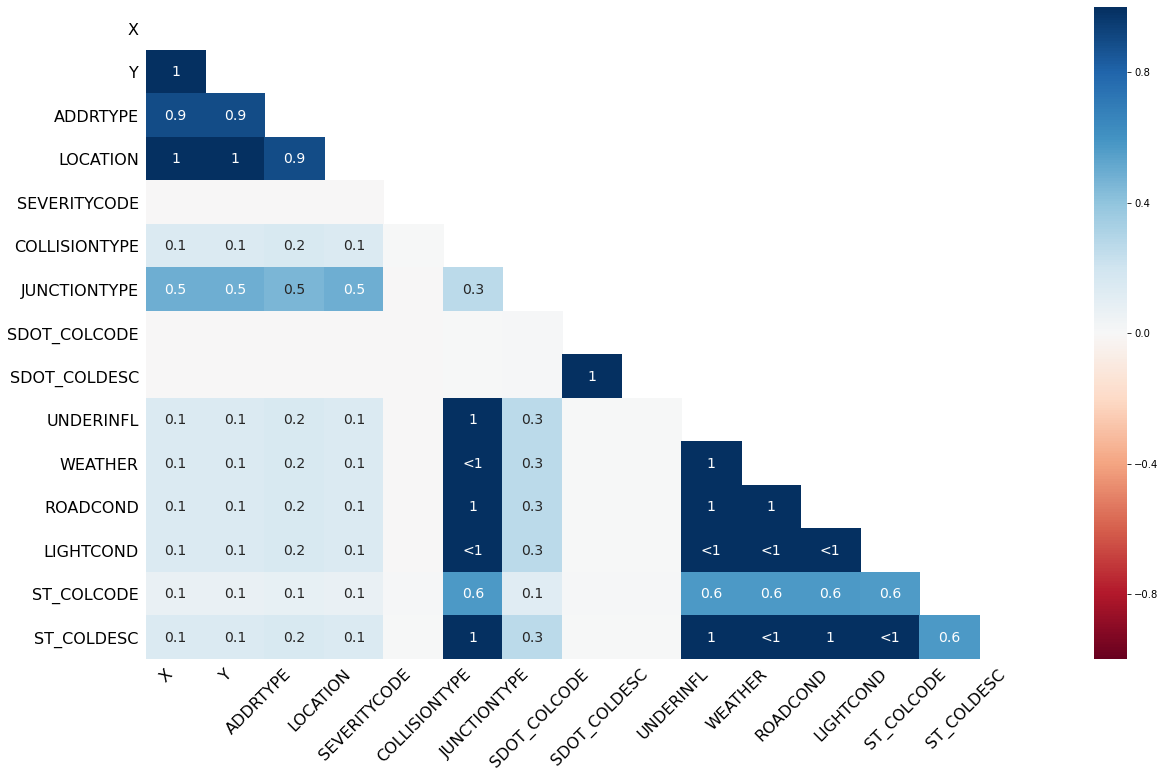

In [216]:
msno.heatmap(df3[['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',\
       'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',\
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',\
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',\
       'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER', 'ROADCOND',\
       'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',\
       'HITPARKEDCAR', 'INCDAY', 'INCMONTH', 'INCYEAR', 'INCHOUR',\
       'INCWEEKDAY']])

In [221]:
df3['ST_COLDESC']

0         From same direction - both going straight - bo...
1                                    One parked--one moving
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
221384                                    Entering at angle
221385                                                  NaN
221386                     From same direction - all others
221387                                         Fixed object
221388                               One parked--one moving
Name: ST_COLDESC, Length: 221389, dtype: object

In [241]:
df3.tail(8)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,INCDAY,INCMONTH,INCYEAR,INCHOUR,INCWEEKDAY,INCWEEKDAYNAME,latitude,longitude,ST_COLDESC_Missing
221381,-122.291971,47.570391,221382,330753,332253,3856848,Unmatched,Block,RAINIER AVE S BETWEEN S COURT ST AND 33RD AVE S,0,Unknown,NaN,0,0,0,0,0,0,0,2020-04-13,2020-04-13 00:00:00,NaN,0.0,NOT ENOUGH INFORMATION / NOT APPLICABLE,NaN,NaN,NaN,NaN,,NaN,0,0,Y,13,4,2020,0,0,Mon,NaN,NaN,True
221382,-122.314012,47.726661,221383,330031,331531,C823617,Unmatched,Block,NE 135TH ST BETWEEN 12TH AVE NE AND 15TH AVE NE,0,Unknown,NaN,0,0,0,0,0,0,0,2019-11-24,2019-11-24 00:00:00,Driveway Junction,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,,NaN,0,0,N,24,11,2019,0,6,Sun,NaN,NaN,True
221383,-122.329081,47.690342,221384,331925,333425,EA36099,Matched,Block,BANNER WAY NE BETWEEN NE 85TH ST OFF RP AND CO...,1,Property Damage Only Collision,Other,1,0,0,1,0,0,0,2020-05-25,2020-05-25 13:22:00,Mid-Block (not related to intersection),26.0,MOTOR VEHICLE STRUCK OBJECT IN ROAD,N,Raining,Wet,Daylight,50,Fixed object,0,0,N,25,5,2020,13,0,Mon,NaN,NaN,False
221384,-122.269996,47.519038,221385,330947,332447,EA30523,Matched,Intersection,51ST AVE S AND S FLETCHER ST,1,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,2020-04-24,2020-04-24 14:33:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Dry,Daylight,10,Entering at angle,0,0,N,24,4,2020,14,4,Fri,NaN,NaN,False
221385,-122.314883,47.693540,221386,330725,332225,EA28885,Unmatched,Block,12TH AVE NE BETWEEN NE 89TH ST AND NE 90TH ST,1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020-04-12,2020-04-12 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,,NaN,0,0,Y,12,4,2020,0,6,Sun,NaN,NaN,True
221386,-122.317262,47.595407,221387,329696,331196,EA20226,Matched,Block,12TH AVE S BETWEEN XW S LANE ST AND GOLF DR S,2,Injury Collision,Other,2,0,0,2,1,0,0,2020-02-24,2020-02-24 09:26:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Dry,Daylight,23,From same direction - all others,0,0,N,24,2,2020,9,0,Mon,NaN,NaN,False
221387,-122.382208,47.581162,221388,330255,331755,3856332,Matched,Block,SW ADMIRAL WAY BETWEEN 39TH AVE SW AND WALNUT ...,2,Injury Collision,Other,4,0,0,1,4,0,0,2020-03-13,2020-03-13 06:53:00,Mid-Block (not related to intersection),26.0,MOTOR VEHICLE STRUCK OBJECT IN ROAD,N,Raining,Wet,Dark - Street Lights On,50,Fixed object,0,0,N,13,3,2020,6,4,Fri,NaN,NaN,False
221388,-122.379631,47.666895,221389,329849,331349,EA22799,Matched,Block,TALLMAN AVE NW BETWEEN NW IONE PL AND NW CENTR...,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2020-03-10,2020-03-10 12:03:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,32,One parked--one moving,0,0,N,10,3,2020,12,1,Tue,NaN,NaN,False


In [234]:
df3['ST_COLDESC'].isnull()

0         False
1         False
2          True
3          True
4          True
          ...  
221384    False
221385     True
221386    False
221387    False
221388    False
Name: ST_COLDESC, Length: 221389, dtype: bool

In [230]:
df3['ST_COLDESC_Missing'] = df3['ST_COLDESC'].isnull()

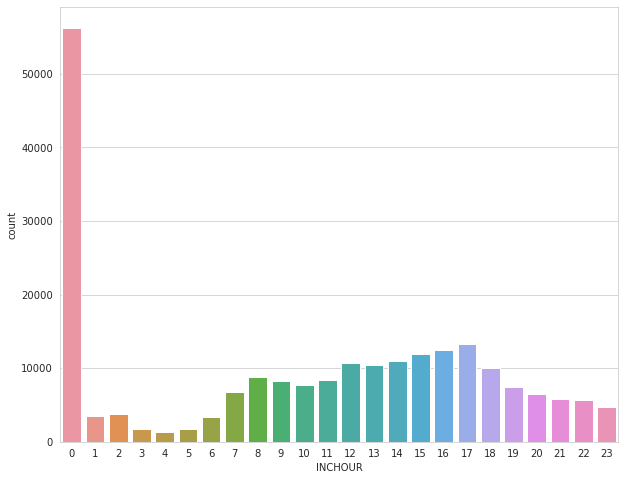

In [237]:
plt.figure(figsize=(10,8))
sns.set_style(style="whitegrid")
ax = sns.countplot(x="INCHOUR", data=df3)

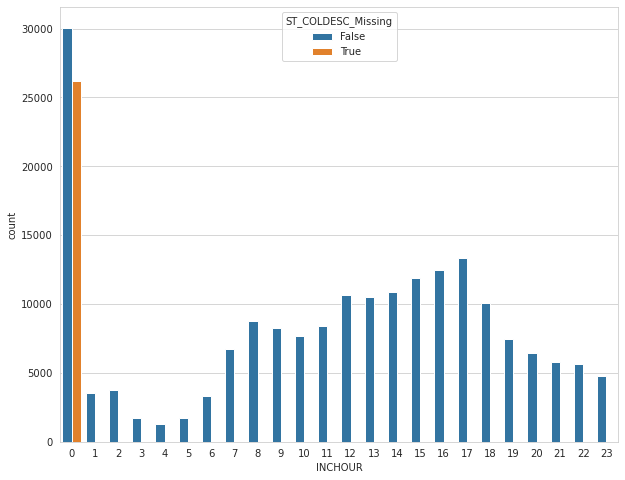

In [233]:
plt.figure(figsize=(10,8))
sns.set_style(style="whitegrid")
ax = sns.countplot(x="INCHOUR", hue='ST_COLDESC_Missing', data=df3)

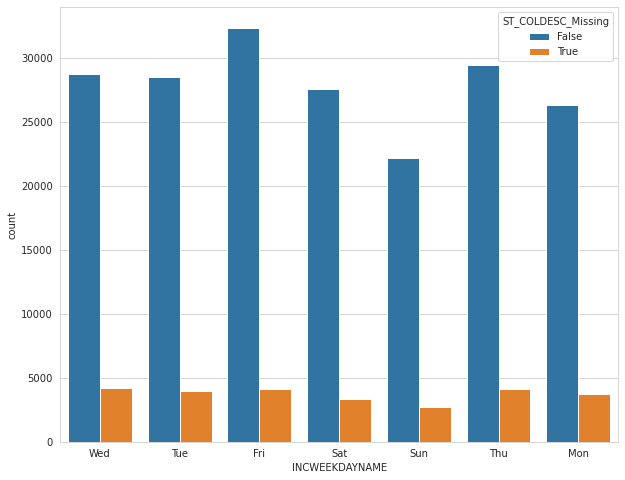

In [242]:
plt.figure(figsize=(10,8))
sns.set_style(style="whitegrid")
ax = sns.countplot(x="INCWEEKDAYNAME", hue='ST_COLDESC_Missing', data=df3)

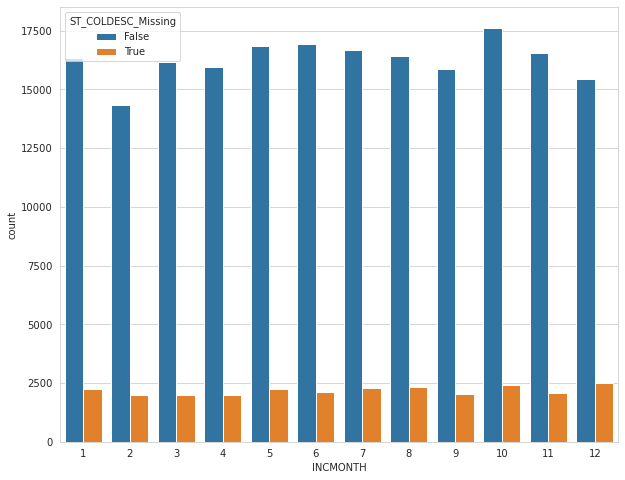

In [243]:
plt.figure(figsize=(10,8))
sns.set_style(style="whitegrid")
ax = sns.countplot(x="INCMONTH", hue='ST_COLDESC_Missing', data=df3)

In [244]:
df3[~df3['ST_COLDESC'].isnull()]['INCDTTM']

0        2020-01-22 15:21:00
1        2020-01-07 08:00:00
5        2020-06-11 17:07:00
6        2020-02-03 09:49:00
8        2020-01-30 08:32:00
                 ...        
221383   2020-05-25 13:22:00
221384   2020-04-24 14:33:00
221386   2020-02-24 09:26:00
221387   2020-03-13 06:53:00
221388   2020-03-10 12:03:00
Name: INCDTTM, Length: 195159, dtype: datetime64[ns]

In [248]:
# delete latitude and longitude columns
df3.drop(columns=['latitude','longitude'],axis=1,inplace=True)

In [280]:
seriesMissingPer_df3 = df3.isnull().sum()/df3.shape[0]*100
seriesMissingPer_sortdf3 = seriesMissingPer_df3.sort_values(ascending=True)

Text(0.5, 1.0, 'Percentage of missing records for each attribute')

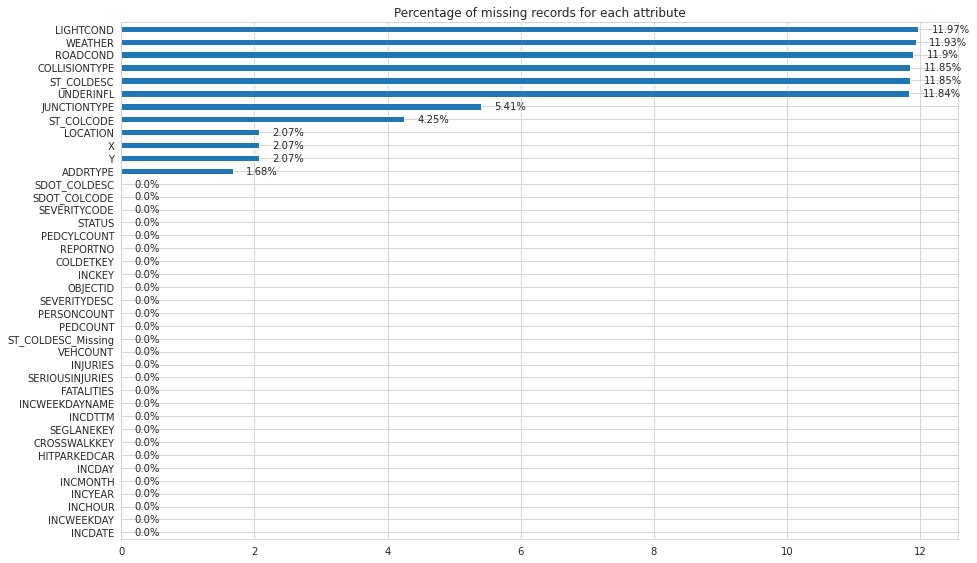

In [281]:
#plot percentage of missing records for each attribute
plt.figure(figsize=(15,9.5))
seriesMissingPer_sortdf3.plot.barh()

#annotate bar counts    
for i, v in enumerate(seriesMissingPer_sortdf3):
    plt.text(v+0.2, i, str(round(v, 2))+'%', va="center")    
plt.title('Percentage of missing records for each attribute')

In [249]:
# Delete rows where X and Y are missing
df4 = df3.dropna(subset = ['X','Y'])

In [250]:
seriesMissingPer_df4 = df4.isnull().sum()/df4.shape[0]*100
seriesMissingPer_sortdf4 = seriesMissingPer_df4.sort_values(ascending=True)

Text(0.5, 1.0, 'Percentage of missing records for each attribute')

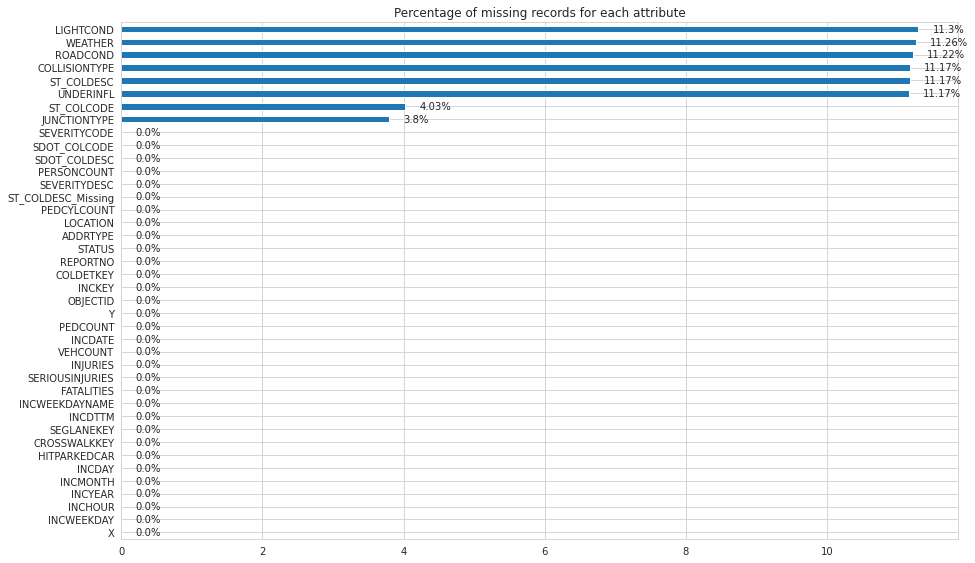

In [251]:
#plot percentage of missing records for each attribute
plt.figure(figsize=(15,9.5))
seriesMissingPer_sortdf4.plot.barh()

#annotate bar counts    
for i, v in enumerate(seriesMissingPer_sortdf4):
    plt.text(v+0.2, i, str(round(v, 2))+'%', va="center")    
plt.title('Percentage of missing records for each attribute')

In [252]:
catColsList = ['LIGHTCOND','WEATHER','ROADCOND','COLLISIONTYPE','UNDERINFL','JUNCTIONTYPE']

In [254]:
#view categorical options for each categorical attribute
for col in catColsList:
    print('Attribute: ',col)
    print(df4[col].unique())


Attribute:  LIGHTCOND
['Dark - Street Lights On' 'Daylight' nan 'Dawn' 'Unknown'
 'Dark - No Street Lights' 'Dark - Street Lights Off' 'Dusk'
 'Dark - Unknown Lighting' 'Other']
Attribute:  WEATHER
['Raining' 'Clear' nan 'Overcast' 'Snowing' 'Unknown' 'Other'
 'Fog/Smog/Smoke' 'Partly Cloudy' 'Sleet/Hail/Freezing Rain'
 'Blowing Sand/Dirt' 'Severe Crosswind' 'Blowing Snow']
Attribute:  ROADCOND
['Wet' 'Dry' nan 'Unknown' 'Standing Water' 'Snow/Slush' 'Ice'
 'Sand/Mud/Dirt' 'Other' 'Oil']
Attribute:  COLLISIONTYPE
['Sideswipe' 'Parked Car' nan 'Rear Ended' 'Other' 'Angles' 'Cycles'
 'Left Turn' 'Pedestrian' 'Right Turn' 'Head On']
Attribute:  UNDERINFL
['N' nan '0' 'Y' '1']
Attribute:  JUNCTIONTYPE
['Mid-Block (not related to intersection)'
 'Mid-Block (but intersection related)'
 'At Intersection (intersection related)' 'Driveway Junction' nan
 'At Intersection (but not related to intersection)' 'Ramp Junction'
 'Unknown']


In [259]:
df4[df4['ST_COLCODE']==' '].shape

(15493, 40)

In [260]:
df4[df4['ST_COLCODE'].isnull()].shape

(8733, 40)

In [263]:
df4[df4['ST_COLDESC'].isnull()].shape

(24226, 40)

In [265]:
#Make empty ST_COLCODE row nans
#df4.loc[(df4['ST_COLCODE']==' '),'ST_COLCODE'] = np.nan

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [266]:
df4[df4['ST_COLCODE'].isnull()].shape

(24226, 40)

In [268]:
seriesMissingPer_df4_2 = df4.isnull().sum()/df4.shape[0]*100
seriesMissingPer_sortdf4_2 = seriesMissingPer_df4_2.sort_values(ascending=True)

Text(0.5, 1.0, 'Percentage of missing records for each attribute')

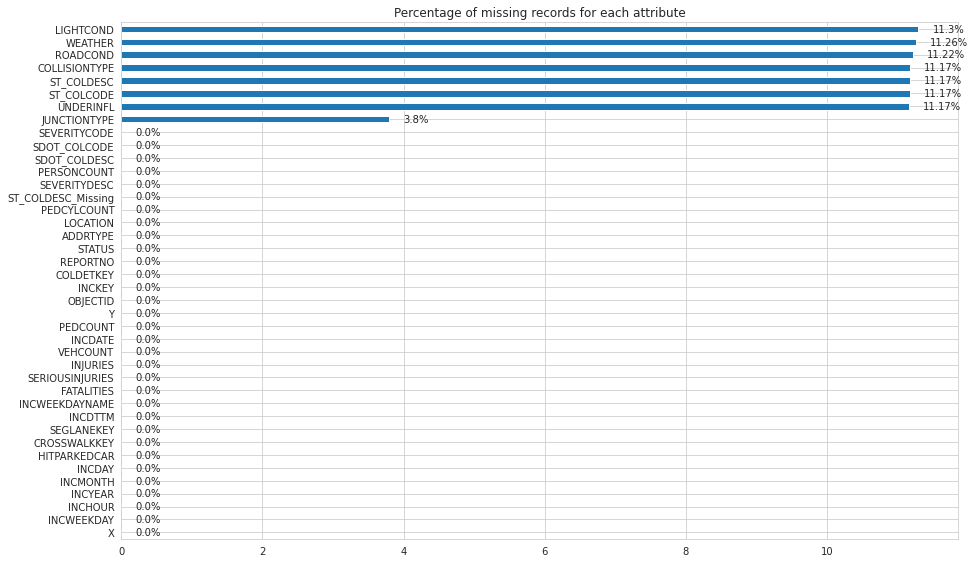

In [269]:
#plot percentage of missing records for each attribute
plt.figure(figsize=(15,9.5))
seriesMissingPer_sortdf4_2.plot.barh()

#annotate bar counts    
for i, v in enumerate(seriesMissingPer_sortdf4_2):
    plt.text(v+0.2, i, str(round(v, 2))+'%', va="center")    
plt.title('Percentage of missing records for each attribute')

In [285]:
df4.describe(include=np.object)

,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,INCWEEKDAYNAME
count,216801,216801,216801,216801,216800,216801,216801,216801,216800,216801,216801,216801,216801,192575,216801,216801,216801
unique,216798,2,2,25198,5,5,11,8,40,5,13,10,10,62,63,2,7
top,1780512,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,1,Property Damage Only Collision,Parked Car,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,32,One parked--one moving,N,Fri
freq,2,192648,144917,298,135184,135184,47073,100914,91886,102445,113743,127466,118384,43493,43493,205113,35752


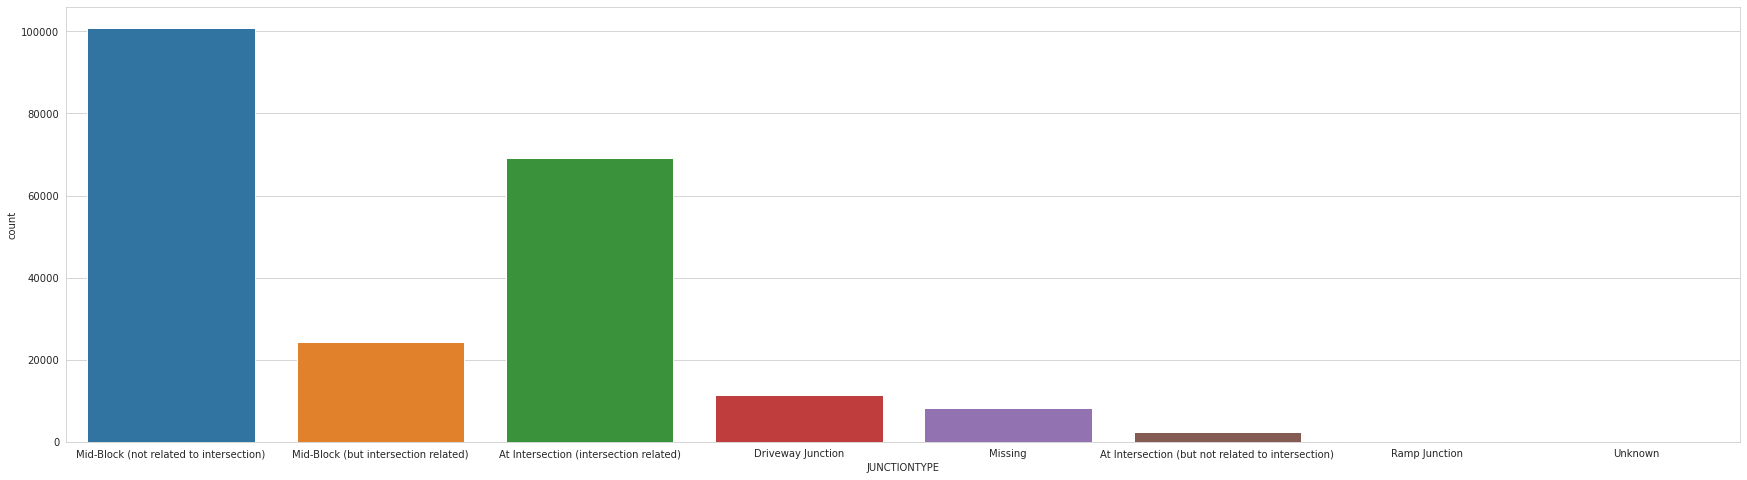

In [289]:
plt.figure(figsize=(30,8))
sns.set_style(style="whitegrid")
ax = sns.countplot(x="JUNCTIONTYPE", data=df4)

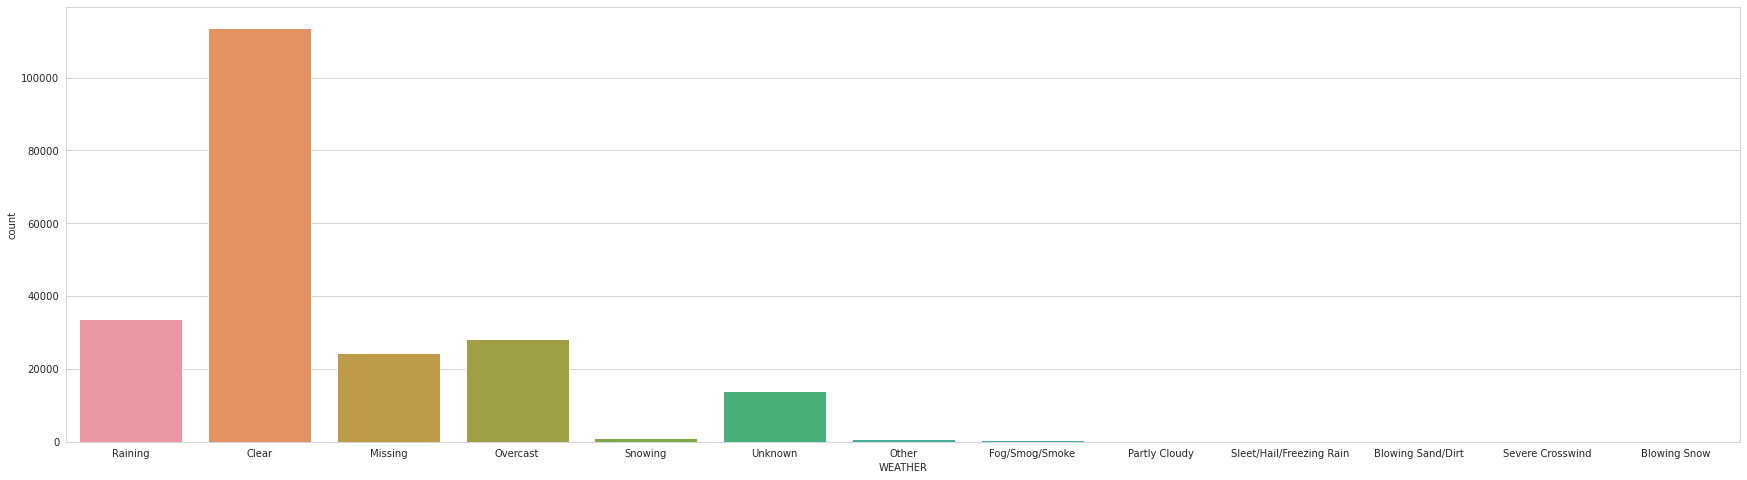

In [290]:
plt.figure(figsize=(30,8))
sns.set_style(style="whitegrid")
ax = sns.countplot(x="WEATHER", data=df4)

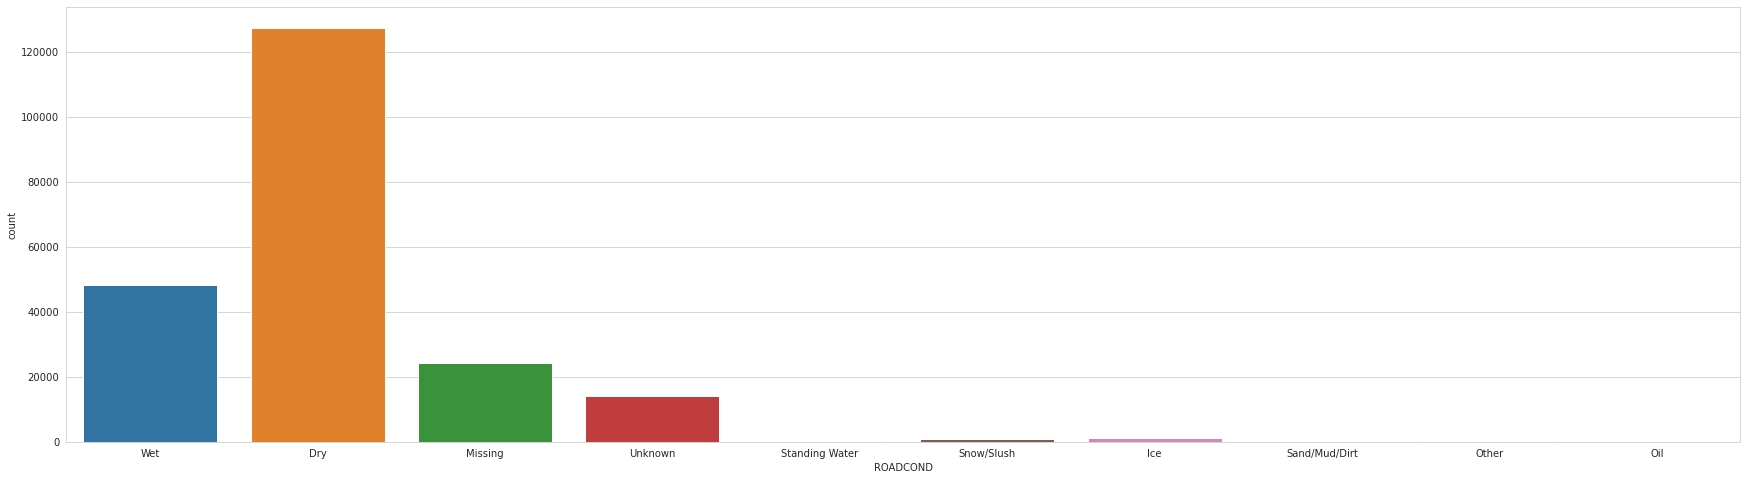

In [291]:
plt.figure(figsize=(30,8))
sns.set_style(style="whitegrid")
ax = sns.countplot(x="ROADCOND", data=df4)

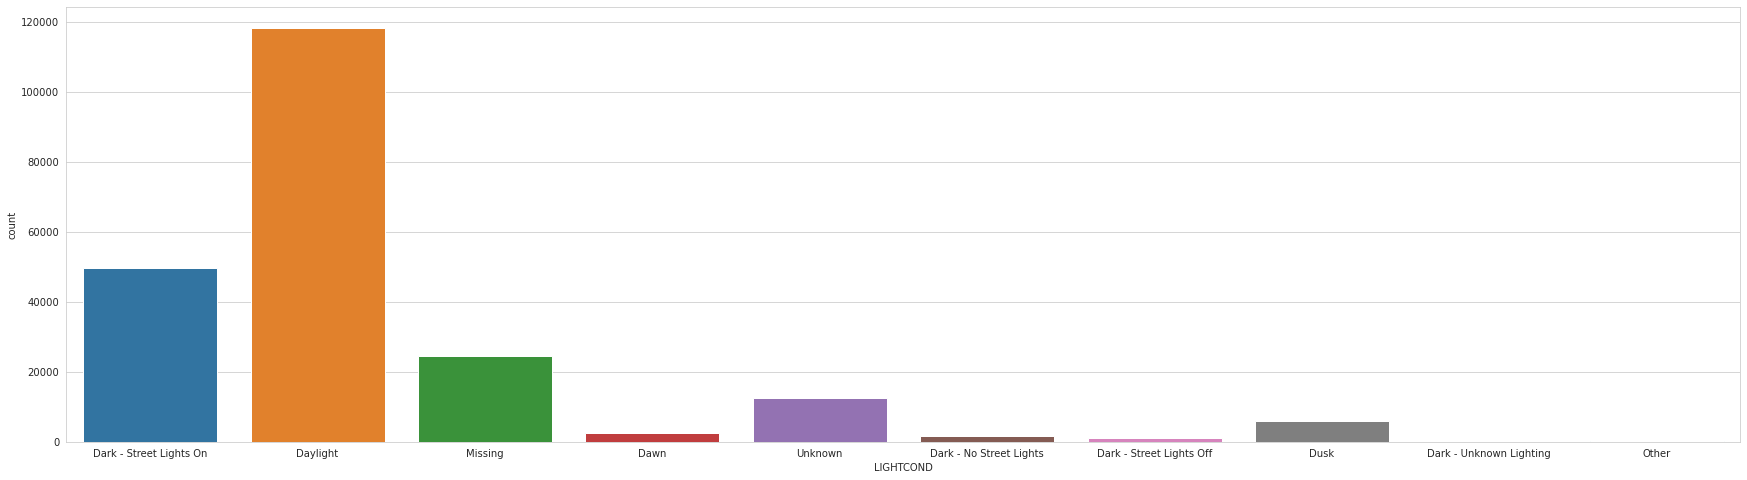

In [292]:
plt.figure(figsize=(30,8))
sns.set_style(style="whitegrid")
ax = sns.countplot(x="LIGHTCOND", data=df4)



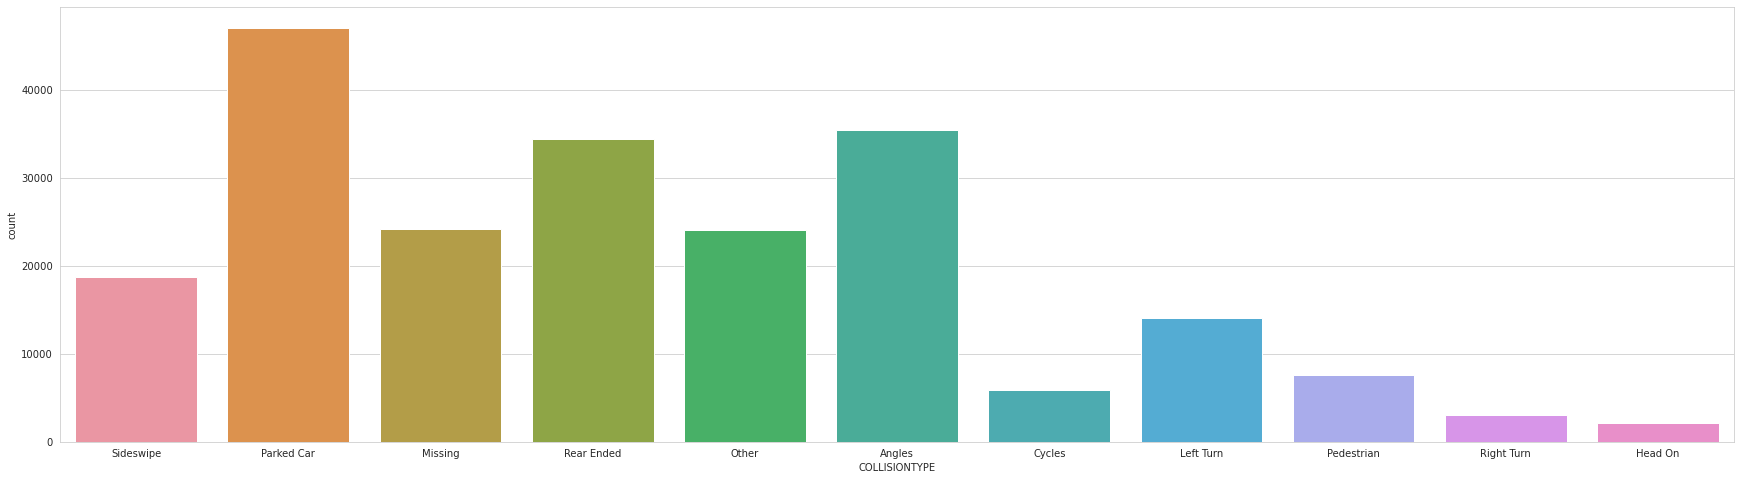

In [293]:
plt.figure(figsize=(30,8))
sns.set_style(style="whitegrid")
ax = sns.countplot(x="COLLISIONTYPE", data=df4)


In [275]:
#make Attribute:  UNDERINFL 0 - 'N'  and 1 -'Y']
df4['UNDERINFL'].value_counts()


N    102445
0     80594
Y      5356
1      4200
Name: UNDERINFL, dtype: int64

In [276]:
#map day of week to string day of week
df4['UNDERINFL_Coded'] = df4['UNDERINFL'].map({'N':0, 'Y':1})

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [277]:
df4['UNDERINFL_Coded'].unique()

array([ 0., nan,  1.])

In [282]:
#make a copy of df4 before making changes
df4_copy = df4.copy()

In [284]:
#Add a Missing category for attributes 'LIGHTCOND','WEATHER','ROADCOND','COLLISIONTYPE','UNDERINFL','JUNCTIONTYPE', 'ST_COLDESC'
df4.loc[df4['LIGHTCOND'].isnull(),'LIGHTCOND']='Missing'
df4.loc[df4['WEATHER'].isnull(),'WEATHER']='Missing'
df4.loc[df4['ROADCOND'].isnull(),'ROADCOND']='Missing'
df4.loc[df4['COLLISIONTYPE'].isnull(),'COLLISIONTYPE']='Missing'
df4.loc[df4['UNDERINFL'].isnull(),'UNDERINFL']='Missing'
df4.loc[df4['JUNCTIONTYPE'].isnull(),'JUNCTIONTYPE']='Missing'
df4.loc[df4['ST_COLDESC'].isnull(),'ST_COLDESC']='Missing'

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [257]:
df4[df4['LIGHTCOND']=='Unknown']['ST_COLCODE'].unique()

array(['32', '24', '45', '28', '10', '23', '11', '30', '0', '51', '13',
       '14', '50', '20', '12', '71', '19', '22', '52', '15', '81', '26',
       '1', '16', '2', '4', '21', '27', '29', '74', '25', '31', '82',
       '73', '3', '84', '53', '48', '5', ' ', '6'], dtype=object)

In [ ]:
#

In [23]:
#df2[['LIGHTCOND','WEATHER','ROADCOND','COLLISIONTYPE','UNDERINFL','JUNCTIONTYPE']].unique()

In [261]:
df4['ST_COLCODE'].unique()

array(['11', '32', nan, ' ', '14', '50', '81', '10', '12', '23', '6',
       '28', '13', '2', '1', '20', '84', '45', '15', '3', '16', '26', '0',
       '19', '5', '25', '24', '74', '73', '71', '30', '27', '21', '83',
       '22', '52', '57', '56', '8', '40', '51', '66', '53', '72', '4',
       '29', '17', '41', '65', '82', '67', '49', '31', '43', '42', '64',
       '48', '54', '60', '87', '7', '18', '85', '88'], dtype=object)

In [262]:
df4['ST_COLDESC'].unique()

array(['From same direction - both going straight - both moving - sideswipe',
       'One parked--one moving', nan,
       'From same direction - both going straight - one stopped - rear-end',
       'Fixed object',
       'Same direction -- both turning left -- both moving -- sideswipe',
       'Entering at angle',
       'From same direction - both going straight - one stopped - sideswipe',
       'From same direction - all others',
       'Pedalcyclist Strikes Moving Vehicle',
       'From opposite direction - one left turn - one straight',
       'From same direction - both going straight - both moving - rear-end',
       'Vehicle turning left hits pedestrian',
       'Vehicle turning right hits pedestrian',
       'One car leaving parked position',
       'Same direction -- both turning left -- one stopped -- rear end',
       'Vehicle - Pedalcyclist',
       'From same direction - one left turn - one straight',
       'Vehicle backing hits pedestrian',
       'From same direction

In [ ]:
(7469, 38)
(2883, 38)

In [ ]:
#sort dataframe on weather
df1_sortWeather = df1.sort_values('WEATHER')
#view completness of each attribute
msno.matrix(df1_sortWeather)

In [ ]:
msno.matrix(df1.sort_values('WEATHER'))